# Group 22 - Predicting Customer Rating Sentiment

---

# 1. Businesss Problem & Motivation 

Civil services companies, such as hotels, rely heavily on customer reviews to understand their service's strengths and weaknesses. Positive reviews help attract more customers and boost profits. However, manually analyzing each review is labor-intensive and inefficient for capturing the overall picture of customer satisfaction.

This project aims to **automate the classification of customer ratings (Low if ratings are below 4 / High if ratings are above 4) using machine learning**. By automating this process, hotels can:
- Eliminate manual biases
- Receive instant feedback
- Quickly identify customer attitudes and take action

Ultimately, this approach can increase customer satisfaction and improve profits.

## Primary goal

The primary goal is to analyze customer review sentiment using machine learning to classify reviews as Positive or Negative, and then leverage this sentiment along with other features to predict whether the overall rating is high or low. **Our main focus is to correct predict Low ratings (True Negative cases).**

**Correctly predicting low ratings is especially crucial in the hotel industry for several specific reasons:**

**1. Early Identification of Service Failures:** Low ratings often signal areas where a hotel’s service falls short—whether it’s cleanliness, staff behavior, or room quality. By predicting these ratings accurately, hotels can quickly identify recurring service failures and take action to prevent further dissatisfaction.

**2. Preventing Negative Reviews from Going Public:** Negative reviews on platforms like TripAdvisor or Google can have a lasting impact on a hotel's reputation. By predicting and identifying which guests are likely to give low ratings, hotels can address concerns during or immediately after a guest's stay, offering solutions such as room upgrades, discounts, or personalized attention, reducing the likelihood of a public negative review.

**3. Improving Guest Experience:** Low ratings often indicate unmet guest expectations, which are critical to the hospitality business. By correctly identifying and addressing the factors that lead to poor ratings (e.g., uncomfortable beds, poor Wi-Fi, or slow service), hotels can consistently improve the overall guest experience.

**4. Reducing Revenue Loss from Cancellations or Poor Retention**: Dissatisfied guests not only leave poor ratings but are less likely to return or recommend the hotel. Predicting low ratings allows hotels to engage these guests proactively and resolve their issues before they check out, increasing the likelihood of repeat bookings and positive word-of-mouth.

**5. Enhancing Staff Training and Operational Efficiency:** Low ratings can highlight problems with specific areas of hotel operations, such as housekeeping or customer service. Accurately predicting these ratings enables management to direct training or resource adjustments where they are most needed, improving operational efficiency and guest satisfaction.

**6. Competitiveness in the Market:** Hotels operate in highly competitive markets where online reviews heavily influence booking decisions. Predicting and addressing low ratings can help hotels maintain higher overall ratings, which are crucial for attracting new customers and staying competitive.

In the hotel business, accurately predicting low ratings allows for targeted, proactive actions to resolve issues, ultimately boosting guest satisfaction, protecting the hotel's reputation, and increasing long-term profitability.

-------

# 2. Dataset Key Information

The data is sourced from a large open **TripAdvisor** review dataset available on **Kaggle**, consisting of 878,561 rows and 19 attributes. To reduce processing time, a subset of the data will be used. The dataset includes two files:
- `offerings.csv` (hotel information)
- `reviews.csv` (customer reviews)

These two files will be merged using the shared column `offering_ID`, representing the hotel ID. 

Also, web scraping was used to gather additional information about the hotels, including details such as the hotel class, number of amenities, price range, distance to the nearest metro station, and the number of nearby attractions, etc. among other features.

**The final dataset (after data collection & merging) has 239,1666 rows and 16 attributes.**

------

# 3. Data Preprocessing

**Note: The process of processing data (include review text) can be found in our another notebook. Here, we continue process data after review text is normalized & categorized under positive / negative review'**

First, let's import all required libraries:

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from skopt import BayesSearchCV 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

Next, we load the dataset into Pandas Dataframe.

In [2]:
df = pd.read_csv('review_normalized.csv')
df.head()

id                           name  \
0  113317  Casablanca Hotel Times Square   
1  113317  Casablanca Hotel Times Square   
2  113317  Casablanca Hotel Times Square   
3  113317  Casablanca Hotel Times Square   
4  113317  Casablanca Hotel Times Square   

                                         description  \
0  Experience the magic of Times Square just step...   
1  Experience the magic of Times Square just step...   
2  Experience the magic of Times Square just step...   
3  Experience the magic of Times Square just step...   
4  Experience the magic of Times Square just step...   

                                              review  hotel_class  \
0  We had a whisper-quiet queen deluxe room couty...          4.0   
1  Great 3 night stay right after Thanksgiving. A...          4.0   
2  I hesitate to give this little gem a stellar r...          4.0   
3  You won't find a more conveniently located hot...          4.0   
4  This small boutique hotel right off Times Squa...          4.0   

   no_of_amenities     price_level  dist_to_metro  no_of_attractions  award  \
0               50  very expensive         130.96                  5      1   
1               50  very expensive         130.96                  5      1   
2               50  very expensive         130.96                  5      1   
3               50  very expensive         130.96                  5      1   
4               50  very expensive         130.96                  5      1   

   ...  sleep_quality  rooms  check_in_front_desk  business_service  ratings  \
0  ...            5.0    5.0                  4.0               4.0      5.0   
1  ...            5.0    4.0                  4.0               4.0      5.0   
2  ...            5.0    5.0                  4.0               4.0      5.0   
3  ...            5.0    4.0                  4.0               4.0      5.0   
4  ...            4.0    4.0                  4.0               4.0      5.0   

                                   normalized_review  \
0  whisper quiet queen deluxe room coutyard room ...   
1  great night stay right thanksgiving agree prev...   
2  hesitate give little gem stellar review fear a...   
3  find conveniently locate hotel nyc pace count ...   
4  small boutique hotel right time square perfect...   

                              normalized_description  \
0  experience magic time square step door escape ...   
1  experience magic time square step door escape ...   
2  experience magic time square step door escape ...   
3  experience magic time square step door escape ...   
4  experience magic time square step door escape ...   

                normalized_name  target  sentiment  
0  casablanca hotel time square       1   positive  
1  casablanca hotel time square       1   positive  
2  casablanca hotel time square       1   positive  
3  casablanca hotel time square       1   positive  
4  casablanca hotel time square       1   positive  

[5 rows x 25 columns]

In [3]:
df_copy = pd.DataFrame(df) #store a copy of the dataframe just in case

# Drop unnecssary columns:
df = df.drop(columns = ['normalized_review', 'normalized_description', 'normalized_name', 'target', 'id', 'name', 'description', 'review'])

df.head()

hotel_class  no_of_amenities     price_level  dist_to_metro  \
0          4.0               50  very expensive         130.96   
1          4.0               50  very expensive         130.96   
2          4.0               50  very expensive         130.96   
3          4.0               50  very expensive         130.96   
4          4.0               50  very expensive         130.96   

   no_of_attractions  award  no_of_reviews  service  cleanliness  value  \
0                  5      1           7596      5.0          5.0    5.0   
1                  5      1           7596      5.0          5.0    5.0   
2                  5      1           7596      5.0          5.0    5.0   
3                  5      1           7596      5.0          5.0    5.0   
4                  5      1           7596      5.0          5.0    5.0   

   location  sleep_quality  rooms  check_in_front_desk  business_service  \
0       5.0            5.0    5.0                  4.0               4.0   
1       5.0            5.0    4.0                  4.0               4.0   
2       5.0            5.0    5.0                  4.0               4.0   
3       5.0            5.0    4.0                  4.0               4.0   
4       5.0            4.0    4.0                  4.0               4.0   

   ratings sentiment  
0      5.0  positive  
1      5.0  positive  
2      5.0  positive  
3      5.0  positive  
4      5.0  positive

## Step 1: Check null

In [4]:
df.isna().sum()

hotel_class            0
no_of_amenities        0
price_level            0
dist_to_metro          0
no_of_attractions      0
award                  0
no_of_reviews          0
service                0
cleanliness            0
value                  0
location               0
sleep_quality          0
rooms                  0
check_in_front_desk    0
business_service       0
ratings                0
sentiment              0
dtype: int64

In [5]:
df = df.dropna()

# re-check if all nulls are removed:

df.isna().sum()

hotel_class            0
no_of_amenities        0
price_level            0
dist_to_metro          0
no_of_attractions      0
award                  0
no_of_reviews          0
service                0
cleanliness            0
value                  0
location               0
sleep_quality          0
rooms                  0
check_in_front_desk    0
business_service       0
ratings                0
sentiment              0
dtype: int64

## Step 2: Check data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239166 entries, 0 to 239165
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   hotel_class          239166 non-null  float64
 1   no_of_amenities      239166 non-null  int64  
 2   price_level          239166 non-null  object 
 3   dist_to_metro        239166 non-null  float64
 4   no_of_attractions    239166 non-null  int64  
 5   award                239166 non-null  int64  
 6   no_of_reviews        239166 non-null  int64  
 7   service              239166 non-null  float64
 8   cleanliness          239166 non-null  float64
 9   value                239166 non-null  float64
 10  location             239166 non-null  float64
 11  sleep_quality        239166 non-null  float64
 12  rooms                239166 non-null  float64
 13  check_in_front_desk  239166 non-null  float64
 14  business_service     239166 non-null  float64
 15  ratings          

**Comments**:

- Categorical variable: price_level (nominal), sentiment (binary) (**hotel_class**: there are values from 0, 1, 1.5, ... 4.5 - weird! supposed to be categorical, but we will treat this as numerical due to this reason.)
- Numerical varibles: rest

## Change our target variable 'ratings' to High (1) if ratings are above 4 & Low (0) if ratings are below 4

The target variable, which represents customer reviews on a scale from 0 to 5 in the original dataset, has been grouped into two categories: Low rating (below 4) and High rating (4 and above), to be used in a binary classification model. **The decision to predict this target variable as binary rather than numerical is based on several reasons:**

- **1. Simplified Analysis and Interpretation**: Binary classification allows for a simpler and more intuitive interpretation of the results. Instead of predicting a specific numerical rating, the model predicts whether a review is generally positive (high) or negative (low). This binary outcome provides clear insights for decision-making, such as whether the customer is likely satisfied or dissatisfied.

- **2. Focus on Actionable Insights**: Grouping reviews into two categories aligns with many business needs, such as identifying which customers are at risk of churn (low ratings) versus those who are satisfied (high ratings). This approach enables targeted actions based on whether customers are experiencing positive or negative experiences, rather than focusing on the specific rating value.

- **3. Avoiding Noise in the Data:** Treating the target as a numerical variable can introduce noise, as there may not be a clear distinction between adjacent rating values (e.g., 3 versus 4). Grouping the ratings reduces the variability and potential noise in the target variable, making it easier for the model to identify meaningful patterns.

- **4. Model Complexity and Performance:** Predicting a numerical value (regression) requires more complex models and can be challenging when the ratings are subjective. Binary classification models are often simpler to train, require fewer computational resources, and can achieve higher performance for distinguishing between two groups.

In [4]:
# Re-arrange: Move our target variable 'ratings' to the last column:

# Get all columns except 'ratings'
columns = [col for col in df.columns if col != 'ratings']

# Reorder the DataFrame with 'ratings' as the last column
df = df[columns + ['ratings']]

# Now 'ratings' is the last column in df
df.head()

hotel_class  no_of_amenities     price_level  dist_to_metro  \
0          4.0               50  very expensive         130.96   
1          4.0               50  very expensive         130.96   
2          4.0               50  very expensive         130.96   
3          4.0               50  very expensive         130.96   
4          4.0               50  very expensive         130.96   

   no_of_attractions  award  no_of_reviews  service  cleanliness  value  \
0                  5      1           7596      5.0          5.0    5.0   
1                  5      1           7596      5.0          5.0    5.0   
2                  5      1           7596      5.0          5.0    5.0   
3                  5      1           7596      5.0          5.0    5.0   
4                  5      1           7596      5.0          5.0    5.0   

   location  sleep_quality  rooms  check_in_front_desk  business_service  \
0       5.0            5.0    5.0                  4.0               4.0   
1       5.0            5.0    4.0                  4.0               4.0   
2       5.0            5.0    5.0                  4.0               4.0   
3       5.0            5.0    4.0                  4.0               4.0   
4       5.0            4.0    4.0                  4.0               4.0   

  sentiment  ratings  
0  positive      5.0  
1  positive      5.0  
2  positive      5.0  
3  positive      5.0  
4  positive      5.0

In [11]:
df['ratings'].value_counts()

ratings
5.0    101589
4.0     76777
3.0     31063
2.0     15680
1.0     14057
Name: count, dtype: int64

In [5]:
# 'ratings': 0 = Low, 1 = High

df['ratings_binary'] = df['ratings'].apply(lambda val: 1 if val >= 4 else 0)

df = df.drop(['ratings'], axis = 1)

df.head()

hotel_class  no_of_amenities     price_level  dist_to_metro  \
0          4.0               50  very expensive         130.96   
1          4.0               50  very expensive         130.96   
2          4.0               50  very expensive         130.96   
3          4.0               50  very expensive         130.96   
4          4.0               50  very expensive         130.96   

   no_of_attractions  award  no_of_reviews  service  cleanliness  value  \
0                  5      1           7596      5.0          5.0    5.0   
1                  5      1           7596      5.0          5.0    5.0   
2                  5      1           7596      5.0          5.0    5.0   
3                  5      1           7596      5.0          5.0    5.0   
4                  5      1           7596      5.0          5.0    5.0   

   location  sleep_quality  rooms  check_in_front_desk  business_service  \
0       5.0            5.0    5.0                  4.0               4.0   
1       5.0            5.0    4.0                  4.0               4.0   
2       5.0            5.0    5.0                  4.0               4.0   
3       5.0            5.0    4.0                  4.0               4.0   
4       5.0            4.0    4.0                  4.0               4.0   

  sentiment  ratings_binary  
0  positive               1  
1  positive               1  
2  positive               1  
3  positive               1  
4  positive               1

-----

------

# 4. Feature engineering

## 4.1. Categorical variables: One-hot coding

- **Binary categorical variable ('sentiment')**

In [6]:
# 'Sentiment': 0 = negative, 1 = positive

df['sentiment'] = df['sentiment'].apply(lambda val: 1 if val == 'positive' else 0)

- **Nominal categorical variable ('price_level')**

In [7]:
df['price_level'].value_counts()

price_level
very expensive    120682
expensive          59009
moderate           46362
low                10287
Not Specified       2826
Name: count, dtype: int64

In [8]:
# Create a one-hot encoded set of the 'price_level' values, using pd.get_dummies() & Convert boolean columns to integer (0/1):
price_level_set = pd.get_dummies(df['price_level'], prefix = 'price_level').astype(int)

# Concatenate this set back to the dataFrame
df = pd.concat([df, price_level_set], axis=1)

# Let's now have a look:
df.head()

hotel_class  no_of_amenities     price_level  dist_to_metro  \
0          4.0               50  very expensive         130.96   
1          4.0               50  very expensive         130.96   
2          4.0               50  very expensive         130.96   
3          4.0               50  very expensive         130.96   
4          4.0               50  very expensive         130.96   

   no_of_attractions  award  no_of_reviews  service  cleanliness  value  ...  \
0                  5      1           7596      5.0          5.0    5.0  ...   
1                  5      1           7596      5.0          5.0    5.0  ...   
2                  5      1           7596      5.0          5.0    5.0  ...   
3                  5      1           7596      5.0          5.0    5.0  ...   
4                  5      1           7596      5.0          5.0    5.0  ...   

   rooms  check_in_front_desk  business_service  sentiment  ratings_binary  \
0    5.0                  4.0               4.0          1               1   
1    4.0                  4.0               4.0          1               1   
2    5.0                  4.0               4.0          1               1   
3    4.0                  4.0               4.0          1               1   
4    4.0                  4.0               4.0          1               1   

   price_level_Not Specified  price_level_expensive  price_level_low  \
0                          0                      0                0   
1                          0                      0                0   
2                          0                      0                0   
3                          0                      0                0   
4                          0                      0                0   

   price_level_moderate  price_level_very expensive  
0                     0                           1  
1                     0                           1  
2                     0                           1  
3                     0                           1  
4                     0                           1  

[5 rows x 22 columns]

In [9]:
# Now, we no longer need 'Property_Area' column after encoding it. Hence, we will drop this column:

df = df.drop(['price_level'], axis = 1)

## 4.2. Numerical variables: Standardize

We'll investigate the variance of columns having numerical variables in the dataset to determine which features should be standardized.

In [10]:
# Step 1: Identify all numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Step 2: Exclude boolean columns (columns with exactly 2 unique values)
continuous_cols = numeric_cols.loc[:, numeric_cols.nunique() > 2].columns.tolist()

# Step 3: Calculate variance for only the continuous columns
variance = df[continuous_cols].var()

print(variance)

hotel_class            9.154227e-01
no_of_amenities        5.170557e+02
dist_to_metro          4.473735e+04
no_of_attractions      2.559658e+00
no_of_reviews          1.251214e+07
service                1.293059e+00
cleanliness            1.030005e+00
value                  1.226482e+00
location               6.614198e-01
sleep_quality          8.633781e-01
rooms                  1.055495e+00
check_in_front_desk    1.804572e-01
business_service       1.329029e-01
dtype: float64


In [18]:
# Calculate skewness for these columns
skewed_features = df[continuous_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
print("\nSkewness of Continuous Numeric Features:")
print(skewed_features)


Skewness of Continuous Numeric Features:
no_of_reviews          1.567536
no_of_amenities        0.640266
no_of_attractions      0.589653
dist_to_metro          0.514933
value                 -1.037590
rooms                 -1.165960
service               -1.468825
hotel_class           -1.617172
cleanliness           -1.704974
location              -2.150575
sleep_quality         -2.156172
check_in_front_desk   -3.154459
business_service      -4.543579
dtype: float64


**Comment**: The following features should be standardized due to their skewness values, which indicate deviations from normality: 'no_of_reviews', 'no_of_amenities', 'dist_to_metro', 'no_of_attractions'.

In [11]:
from sklearn.preprocessing import StandardScaler

# Columns to standardize based on high variance and skewness
columns_to_standardize = ['no_of_reviews', 'no_of_amenities', 'dist_to_metro', 
                          'no_of_attractions']

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler only to the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Check the standardized data
print(df[columns_to_standardize].head())

   no_of_reviews  no_of_amenities  dist_to_metro  no_of_attractions
0       1.085053        -0.401305       -0.62376           1.829899
1       1.085053        -0.401305       -0.62376           1.829899
2       1.085053        -0.401305       -0.62376           1.829899
3       1.085053        -0.401305       -0.62376           1.829899
4       1.085053        -0.401305       -0.62376           1.829899


In [12]:
# Re-check variance:

print(df[continuous_cols].var())

hotel_class            0.915423
no_of_amenities        1.000004
dist_to_metro          1.000004
no_of_attractions      1.000004
no_of_reviews          1.000004
service                1.293059
cleanliness            1.030005
value                  1.226482
location               0.661420
sleep_quality          0.863378
rooms                  1.055495
check_in_front_desk    0.180457
business_service       0.132903
dtype: float64


-------

# 5. Correlation heatmap and Target Variable Distribution

**Please note that additional exploratory data analysis (EDA) was conducted in a separate file. In this section, we present the correlation heatmap between the target variable ('ratings_binary') and the feature variables, as well as the distribution of the target variable.**

### Correlation heatmap for categorical variables

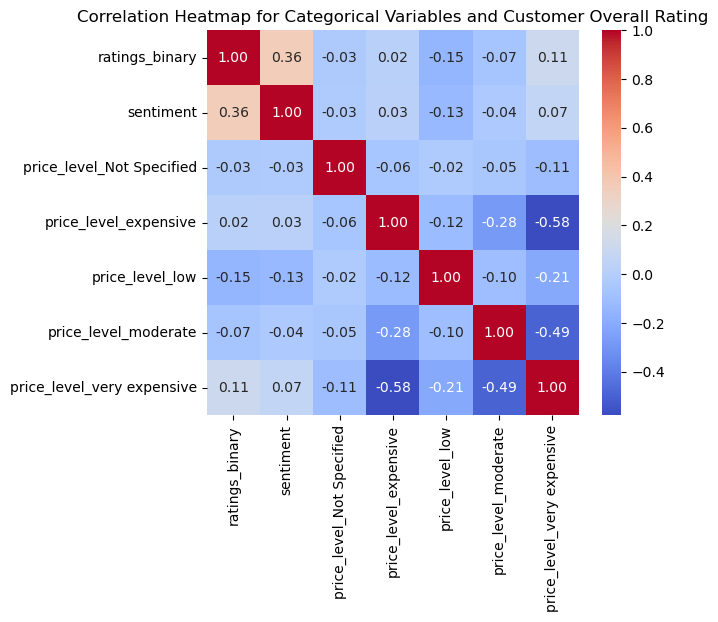

In [18]:
price_level_col = [col for col in df.columns if col in price_level_set.columns]
# Calculate correlation matrix
corr_matrix = df[['ratings_binary'] + ['sentiment'] + price_level_col].corr()

# Generate heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Categorical Variables and Customer Overall Rating')
plt.show()

### Correlation heatmap for numerical variables

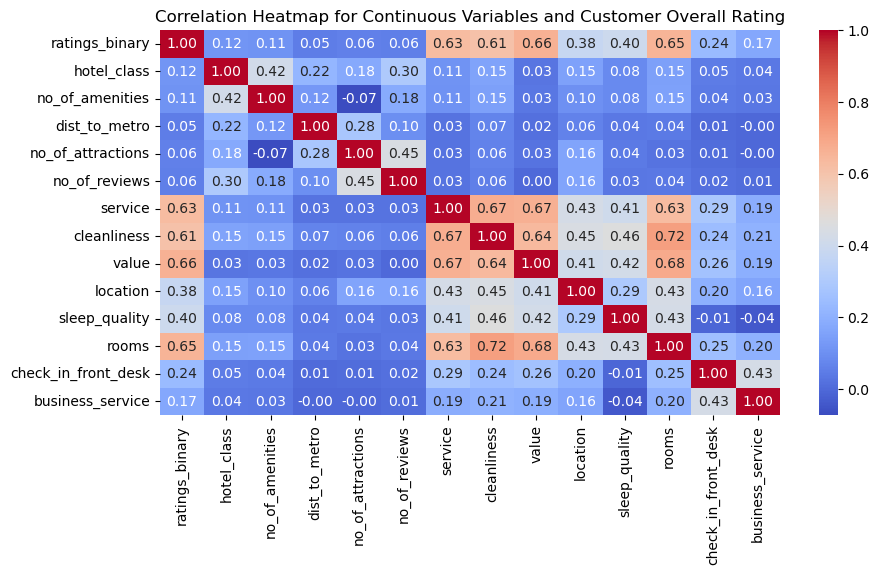

In [19]:
# Step 1: Identify all numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Step 2: Exclude boolean columns (columns with exactly 2 unique values)
continuous_cols = numeric_cols.loc[:, numeric_cols.nunique() > 2].columns.tolist()

# Calculate correlation matrix
corr_matrix = df[['ratings_binary'] + continuous_cols].corr()

# Generate heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Continuous Variables and Customer Overall Rating')
plt.show()

### Correlation Heatmap for all variables

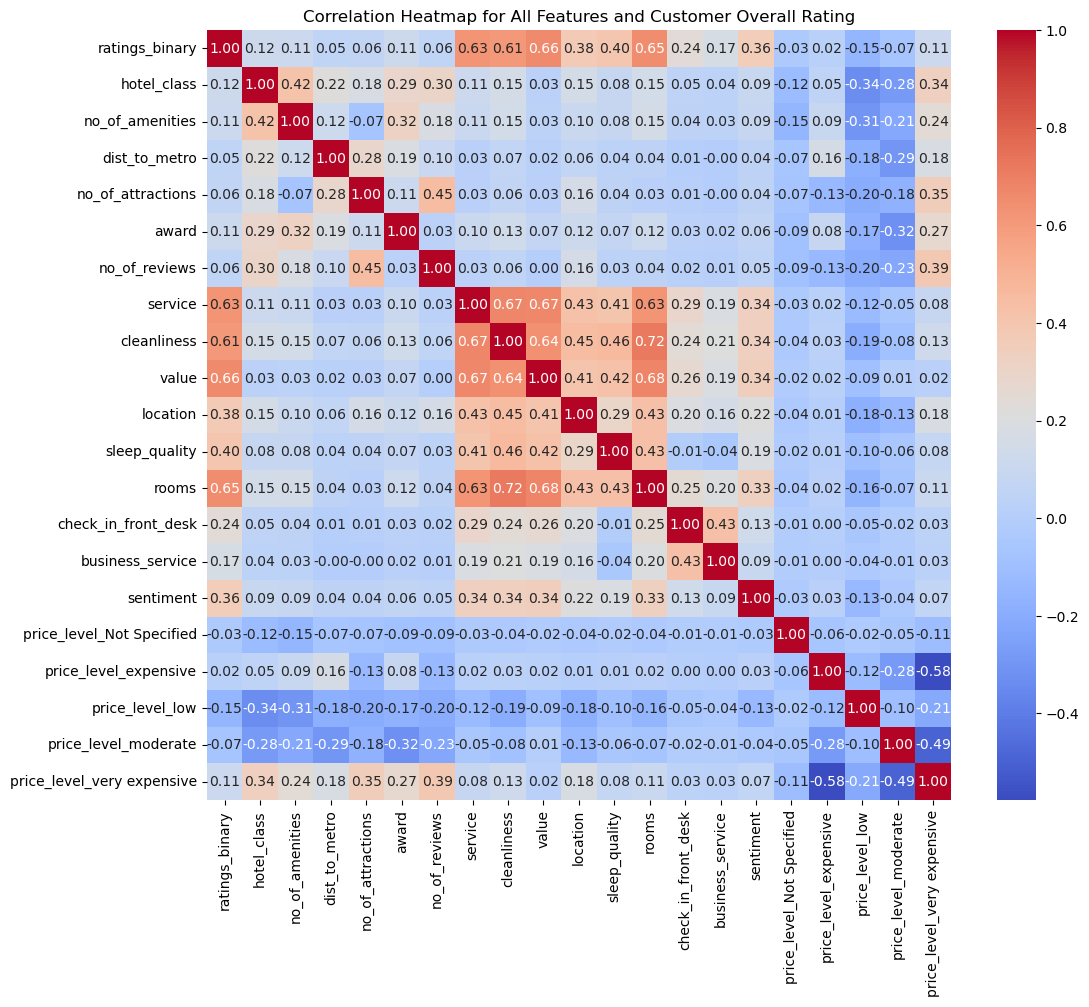

In [20]:
# Get all columns except 'ratings_binary'
columns = [col for col in df.columns if col != 'ratings_binary']

# Reorder the DataFrame with 'ratings' as the last column
df = df[['ratings_binary'] + columns]
final_corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(final_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for All Features and Customer Overall Rating')
plt.show()

**Interpretation**:

- **1. Strong Correlation with Service, Cleanliness, and Value:**

The features service (0.63), cleanliness (0.61), and value (0.66) show strong positive correlations with the target variable ratings_binary. This indicates that higher ratings for these features are associated with a higher likelihood of being classified as a "High" rating, suggesting they are key drivers of positive customer experiences.

- **2. Moderate Correlation with Location and Sleep Quality:**

Location and sleep_quality exhibit moderate correlations (0.38 and 0.40, respectively) with ratings_binary, implying that while these factors contribute to distinguishing between Low and High ratings, they are not as influential as service, cleanliness, or value.

- **3. Weak or Minimal Correlation with Other Features:**

Features such as hotel_class, number_of_reviews, and business_service have weak correlations with ratings_binary, indicating a limited impact on whether a rating falls into the Low or High category.

- **4. No Significant Negative Correlations:**
There are no notable negative correlations with ratings_binary, suggesting that none of the features have an inverse relationship with the likelihood of receiving a High rating.

Overall, the heatmap reveals that service quality, cleanliness, and value play a significant role in determining whether customer ratings are classified as High or Low.

### Distribution of Target Variable

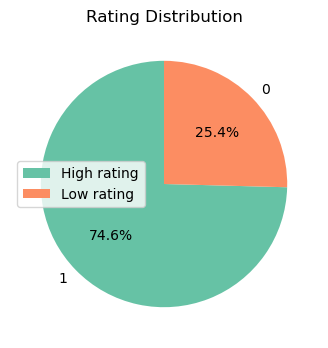

In [21]:
# Distribution of Target Variable ('ratings_binary')
plt.figure(figsize=(6, 4))
df['ratings_binary'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set2'), startangle=90)
plt.title('Rating Distribution')
plt.legend(labels=['High rating', 'Low rating'])
plt.ylabel('')  # Hides the y-label
plt.show()

**Comment: Target variable is extremely imbalanced. Our goal is to predict the minority class (customers with low overal ratings).**

------

# 6. Model Development

### a. Complete Workflow for Model Development

1. **Split the Data:**
   - Divide the dataset into three parts: training set (X_train, y_train), validation set (X_val, y_val), and test set (X_test, y_test).

2. **Apply Resampling Methods:**
   - **Only on the Training Set:** To address class imbalance, apply resampling methods (e.g., oversampling the minority class, undersampling the majority class) **exclusively on the training set (X_train, y_train)**.
   - **Chosen Resampling Methods:**
     - **SMOTE (Synthetic Minority Over-sampling Technique):** Generates synthetic samples for the minority class (low ratings) to increase its representation.
     - **ADASYN (Adaptive Synthetic Sampling):** Similar to SMOTE but focuses on generating more synthetic samples in areas where the minority class is underrepresented.
     - **Random UnderSampling:** Reduces the number of samples from the majority class (high ratings) to balance the class distribution.

3. **Train the Initial Model:**
   - Train an initial model using the original features from the resampled training set (X_train, y_train). This serves as a baseline for comparison.

4. **Evaluate Initial Model Performance:**
   - Assess the model's performance on the validation set (X_val, y_val) to establish a baseline performance metric (e.g., accuracy, F1 score, ROC-AUC).

5. **Perform Feature Selection:**
   - Use only the resampled training set (X_train, y_train) to identify and select relevant features.

6. **Train the Model with Selected Features:**
   - Train the model again using only the selected features from the resampled training set (X_train, y_train).

7. **Evaluate Model Performance After Feature Selection:**
   - Assess the performance of the model with selected features on the validation set (X_val, y_val). Compare this performance with the baseline metrics obtained from the initial model.

8. **Hyperparameter Tuning:**
   - For the best-performing model (selected based on validation metrics), conduct hyperparameter tuning using techniques like Grid Search or Random Search to optimize the model's hyperparameters. Validate the tuned model on the validation set (X_val, y_val).

9. **Test the Final Model:**
   - Evaluate the tuned model's performance on the test set (X_test, y_test) to determine how well it performs on completely unseen data. This step provides an unbiased assessment of the model's effectiveness.

| **Step**                                      | **Description**                                                                                                                                                                 | **Dataset Used**                                 |
|----------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------------------------------|
| **1. Split the Data**                        | Divide the dataset into training set (`X_train, y_train`), validation set (`X_val, y_val`), and test set (`X_test, y_test`).                                                     | Full dataset                                    |
| **2. Apply Resampling Methods**              | Address class imbalance by applying resampling techniques **exclusively on the training set (`X_train, y_train`)**.                                                              | Training set (`X_train, y_train`)               |
| **- Chosen Resampling Methods**              |                                                                                                                                                                                 |                                                 |
| **SMOTE**                                    | Generates synthetic samples for the minority class to increase representation.                                                                                                  | Resampled training set                          |
| **ADASYN**                                   | Similar to SMOTE but generates more synthetic samples in areas where the minority class is underrepresented.                                                                     | Resampled training set                          |
| **Random UnderSampling**                     | Reduces the number of samples from the majority class (high ratings) to balance the class distribution.                                                                          | Resampled training set                          |
| **3. Train the Initial Model**               | Train an initial model using the original features from the resampled training set (`X_train, y_train`).                                                                         | Resampled training set                          |
| **4. Evaluate Initial Model Performance**    | Assess the model's performance on the validation set (`X_val, y_val`) to establish a baseline performance metric (e.g., accuracy, F1 score, ROC-AUC).                             | Validation set (`X_val, y_val`)                 |
| **5. Perform Feature Selection**             | Identify and select relevant features using the resampled training set (`X_train, y_train`).                                                                                     | Resampled training set                          |
| **6. Train the Model with Selected Features**| Retrain the model using only the selected features from the resampled training set (`X_train, y_train`).                                                                         | Resampled training set (selected features)      |
| **7. Evaluate Model Performance**            | Evaluate the model with selected features on the validation set (`X_val, y_val`) and compare to the initial baseline metrics.                                                    | Validation set (`X_val, y_val`)                 |
| **8. Hyperparameter Tuning**                 | Conduct hyperparameter tuning for the best-performing model (based on validation metrics) using techniques like Grid Search or Random Search. Validate on the validation set.     | Resampled training set & validation set         |
| **9. Test the Final Model**                  | Evaluate the tuned model's performance on the test set (`X_test, y_test`) to assess its effectiveness on unseen data.                                                            | Test set (`X_test, y_test`)                     |


## b. Choices of Models

Here we will use the below classification models:

- Logistic Regression
- Decision Tree
- Random Forest
- Näive Bayes
- Ensemble methods: Bagging, Boosting (AdaBoost, XGBoost)


**<u>Why These Models Are Selected?<u>**

| **Model**                            | **Description**                                                                                     | **Sub-Methods**                                                              |
|--------------------------------------|-----------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------|
| **Logistic Regression**              | A simple baseline model for binary classification, offering interpretability.                       |                                                                               |
| **Decision Tree**                    | Provides a non-linear decision-making process and is easy to visualize.                            |                                                                               |
| **Random Forest**                    | An ensemble method that reduces overfitting, improves accuracy, and handles feature importance.   | **Bagging**: Helps in reducing variance (e.g., Random Forest).               |
| **Naive Bayes**                     | Suitable for classification with categorical features and is efficient with a large dataset.       |                                                                               |
| **Ensemble Methods**                 | Includes methods to improve model performance by combining multiple models.                        | **Bagging**: Reduces variance.<br>**AdaBoost**: Focuses on misclassified instances.<br>**XGBoost**: A powerful boosting algorithm for high performance. |

## Splitting dataset into training, testing and validation sets

In [13]:
# Define feature variables (use all columns except 'ratings_binary') and target variable:
X = df.drop(columns=['ratings_binary'])
y = df['ratings_binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, shuffle = True, stratify = y)

# Since the data set is large enough, we perform another split to have a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state=1234, shuffle= True, stratify = y_train)

#The final ratio of the 3 test_set would be train set : validation set : test set = 60:20:20
print(f"Train set: {len(X_train)}, validation set: {len(X_val)}, test set: {len(X_test)}")

Train set: 143499, validation set: 47833, test set: 47834


-------

# 7. Model Training

## 7.1. Before Feature Selection

### a. Model Performance (ROC, AUC, Accuracy, Confusion Matrix)

As mentioned above, at this stage, **we use only training and validation sets.**

In [43]:
import warnings

# Suppress FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

def train_and_evaluate_model(models, X_train, y_train, X_val, y_val, resampling_methods):
    """
    Train and evaluate models with multiple resampling methods, displaying AUC graphs and confusion matrices.
    
    Parameters:
    - models (dict): Dictionary of models to evaluate.
    - X_train (array-like): Feature matrix for training.
    - y_train (array-like): True labels for training.
    - X_val (array-like): Feature matrix for validation.
    - y_val (array-like): True labels for validation.
    - resampling_methods (dict): Dictionary of resampling methods.
    
    Returns:
    - DataFrame: Table containing evaluation metrics for each model.
    - dict: Dictionary of trained models.
    - dict: Dictionary of predictions for training and validation sets.
    """
    results = []
    trained_models = {}
    predictions = {}

    # Define the resampling order and include "Unbalanced" as a baseline
    resampling_order = ['Unbalanced', 'SMOTE', 'ADASYN', 'Random Under Sampling']
    
    # Prepare resampling methods based on the defined order
    selected_resampling_methods = {name: resampling_methods.get(name, None) for name in resampling_order}

    # Plot confusion matrices for each model
    fig, axes = plt.subplots(len(models), len(selected_resampling_methods), figsize=(24, 6 * len(models)))
    
    for i, (model_name, model) in enumerate(models.items()):
        for j, (resample_name, resampler) in enumerate(selected_resampling_methods.items()):
            # Resample the training data if the method is provided
            if resampler:
                X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
            else:
                X_train_resampled, y_train_resampled = X_train, y_train

            # Train the model on the resampled data
            model.fit(X_train_resampled, y_train_resampled)

            # Predict on the validation set
            y_pred_val = model.predict(X_val)
            y_pred_train = model.predict(X_train_resampled)

            # Store predictions
            trained_models[f'{model_name} - {resample_name}'] = model
            predictions[f'{model_name} - {resample_name}'] = {'train': y_pred_train, 'val': y_pred_val}

            # Compute the confusion matrix for the validation set
            cm = confusion_matrix(y_val, y_pred_val, normalize='true')
            sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', ax=axes[i, j],
                        xticklabels=["Low rating", "High rating"],
                        yticklabels=["Low rating", "High rating"])
            axes[i, j].set_title(f'{model_name} - {resample_name}')
            axes[i, j].set_xlabel("Predicted Class")
            axes[i, j].set_ylabel("Actual Class")

            # Compute evaluation metrics
            metrics = {
                'Model': f'{model_name} - {resample_name}',
                'Accuracy': accuracy_score(y_val, y_pred_val),
                'Precision ("low ratings" class)': precision_score(y_val, y_pred_val, pos_label=0),
                'Recall ("low ratings" class)': recall_score(y_val, y_pred_val, pos_label=0),
                'F1-score ("low ratings" class)': f1_score(y_val, y_pred_val, pos_label=0),
            }
            results.append(metrics)

    plt.tight_layout()
    plt.show()

    # Define a list of distinct colors for each model
    colors = [
        'blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink'
    ]

    # Plot AUC curves for each resampling method
    for resample_name, resampler in selected_resampling_methods.items():
        plt.figure(figsize=(10, 8))

        for i, (model_name, model) in enumerate(models.items()):
            # Resample the training data if the method is provided
            if resampler:
                X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
            else:
                X_train_resampled, y_train_resampled = X_train, y_train

            # Train the model on the resampled data
            model.fit(X_train_resampled, y_train_resampled)

            # Predict probability scores for ROC curve calculation
            y_pred_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, 'predict_proba') else None

            # If the model provides probability estimates, calculate ROC and AUC
            if y_pred_proba is not None:
                fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, color=colors[i], label=f'{model_name} (AUC = {roc_auc:.3f})')

        # Plot the diagonal line for a random classifier
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'ROC Curves (Before Feature Selection - based on Validation Set): {resample_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.tight_layout()
        plt.show()

    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)
    return results_df, trained_models, predictions

/opt/software/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


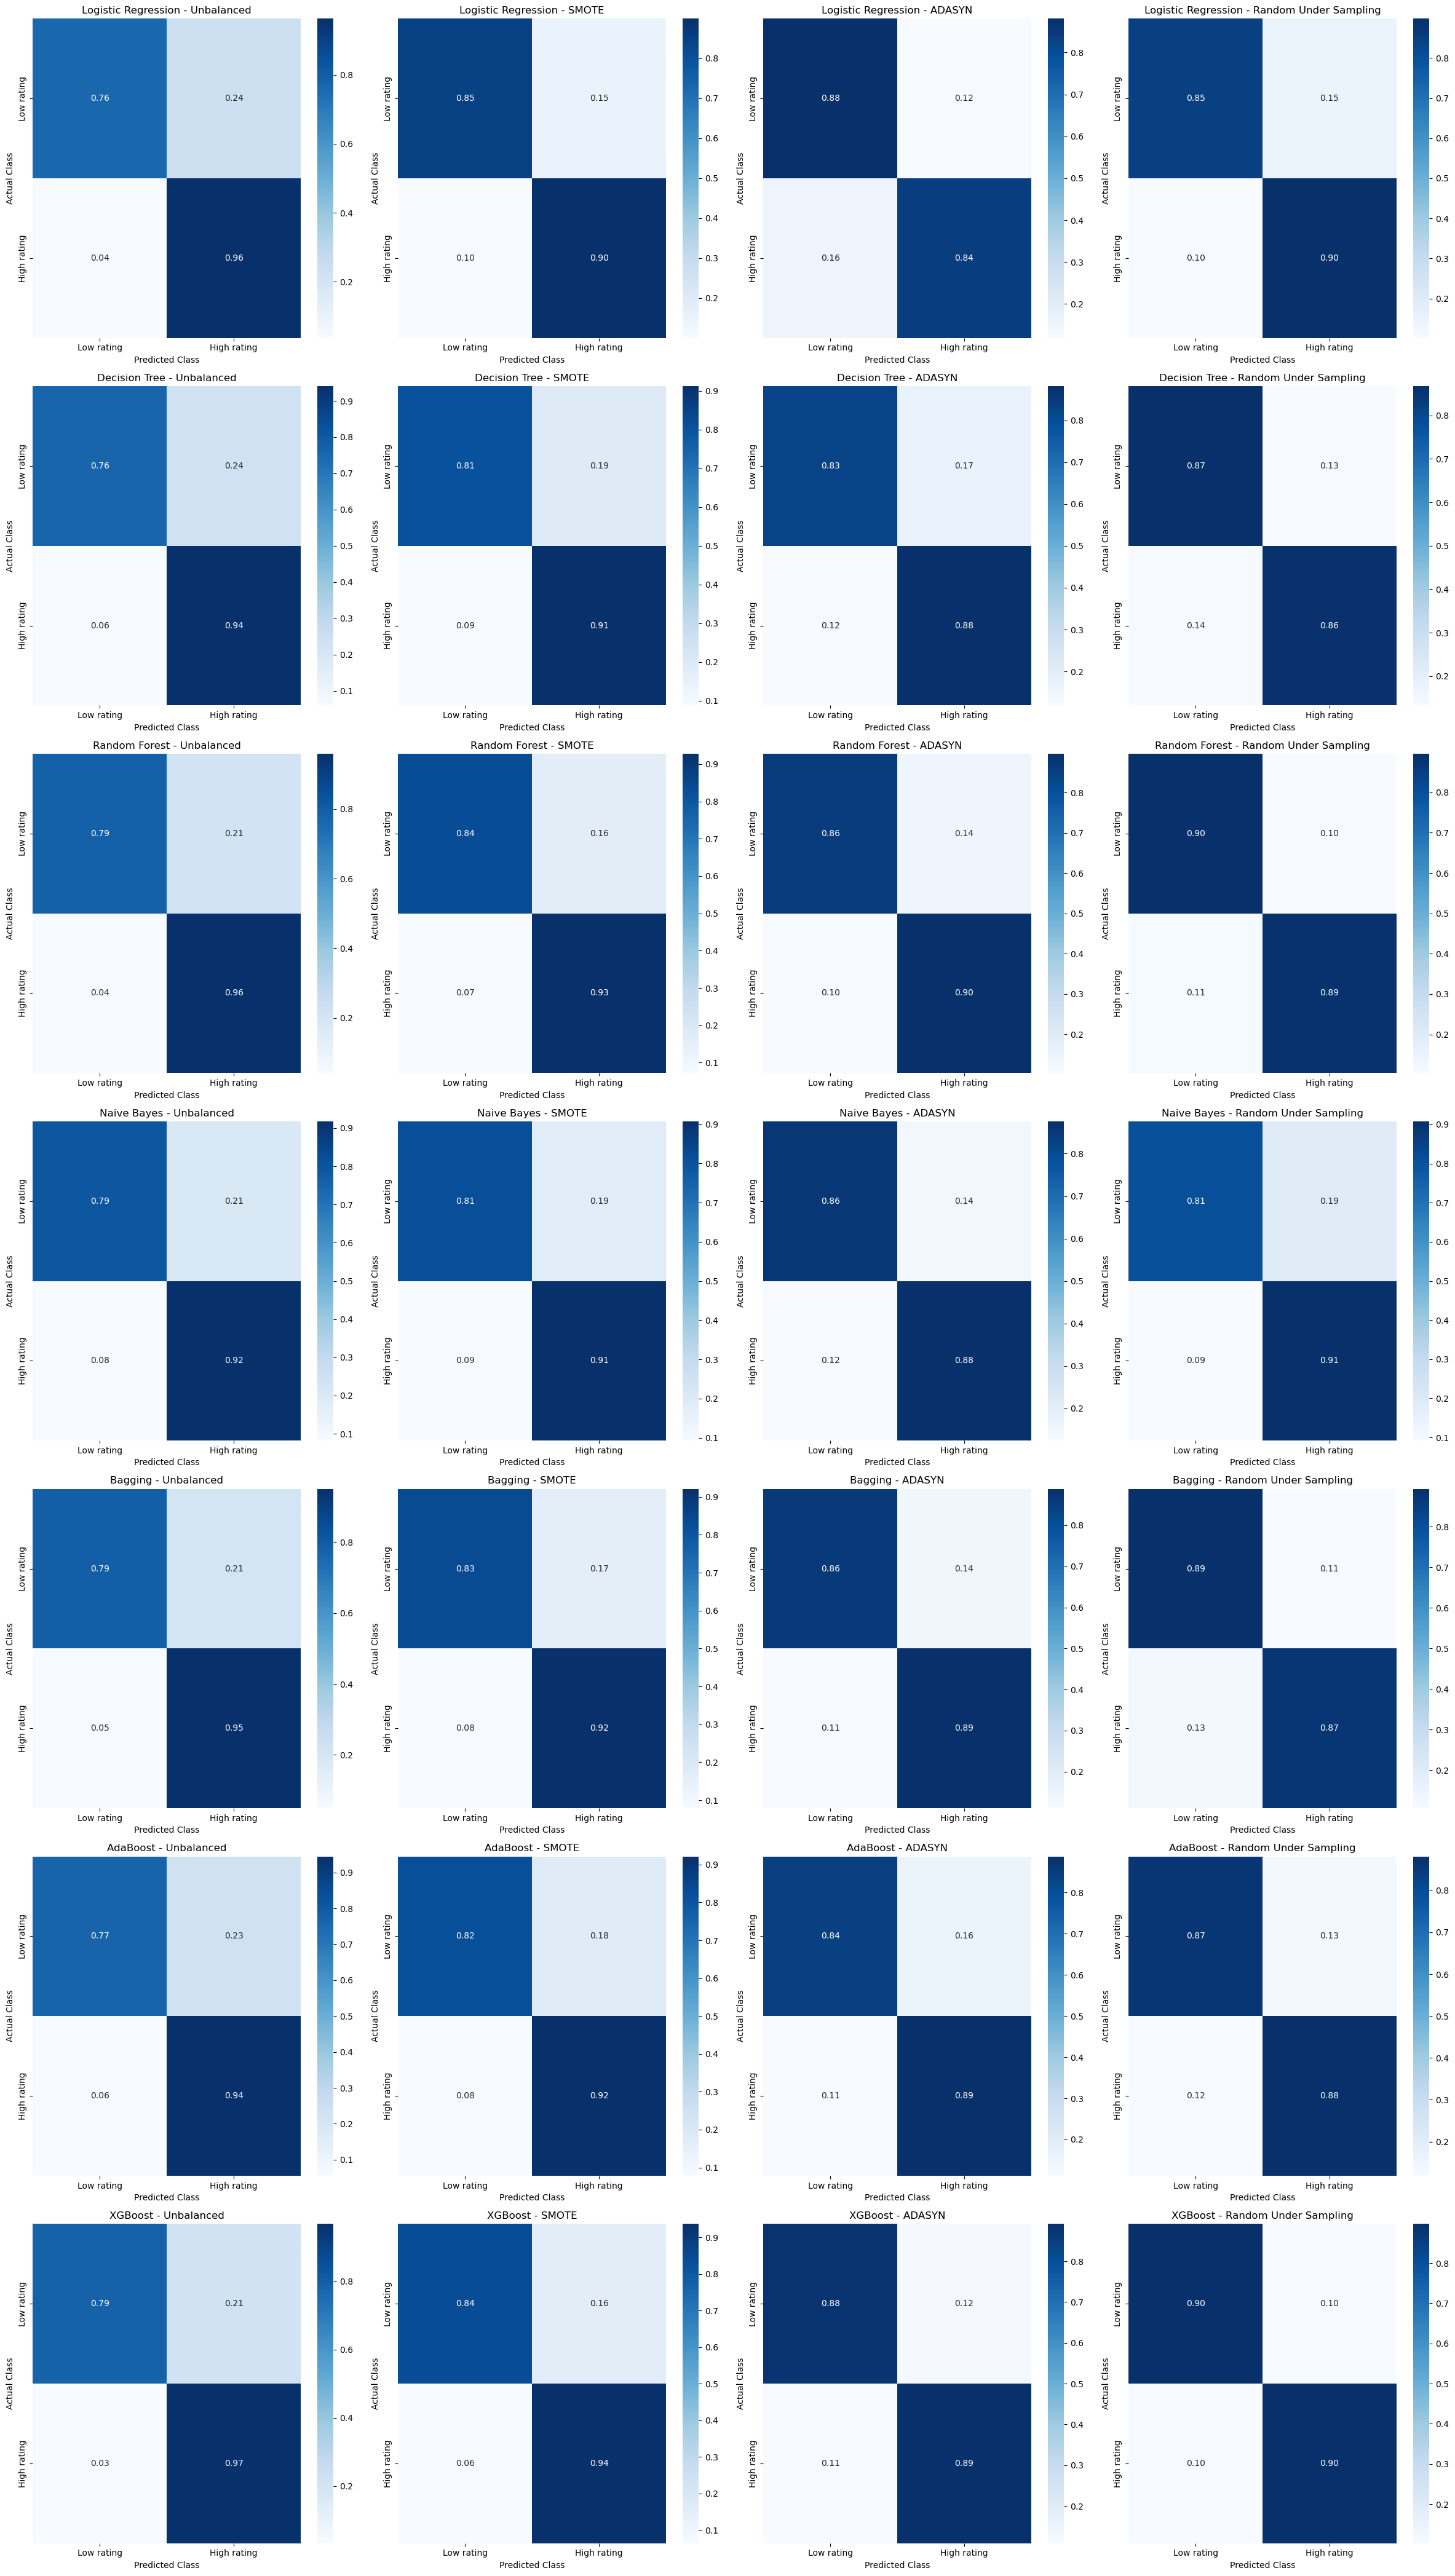

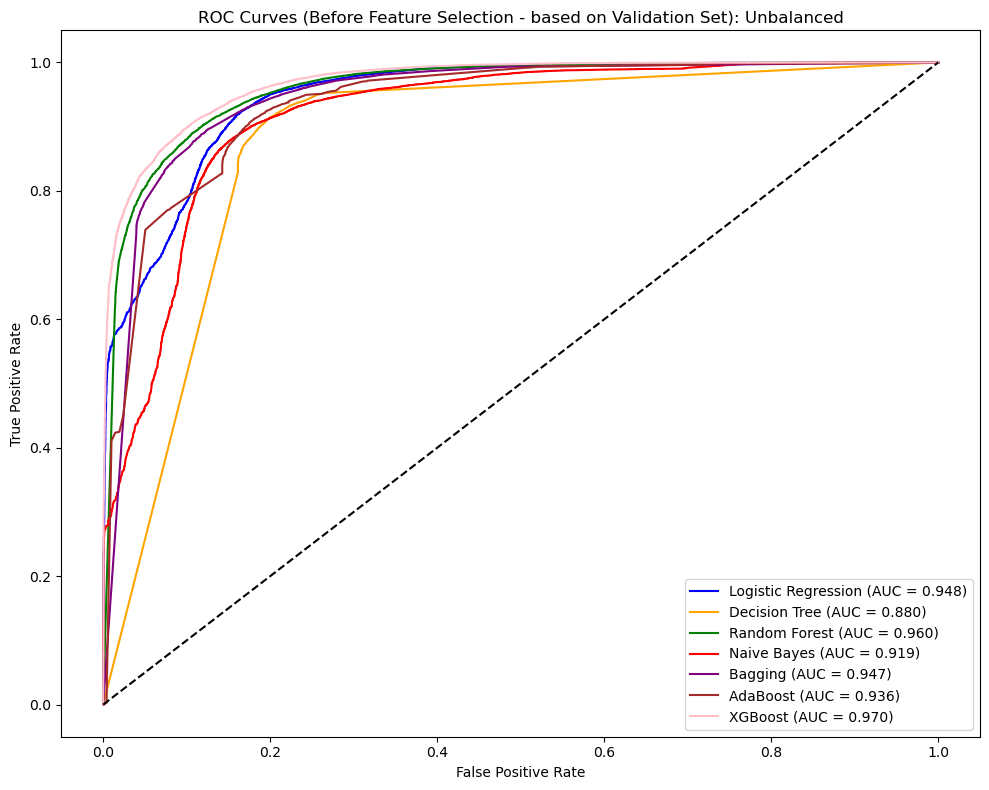

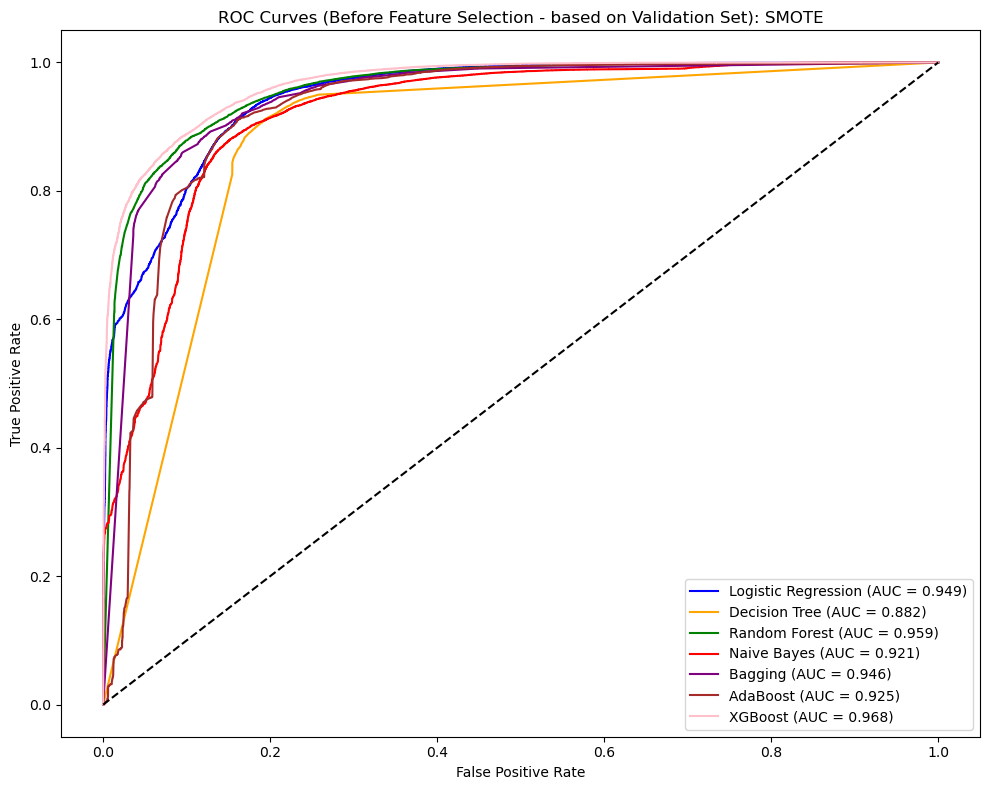

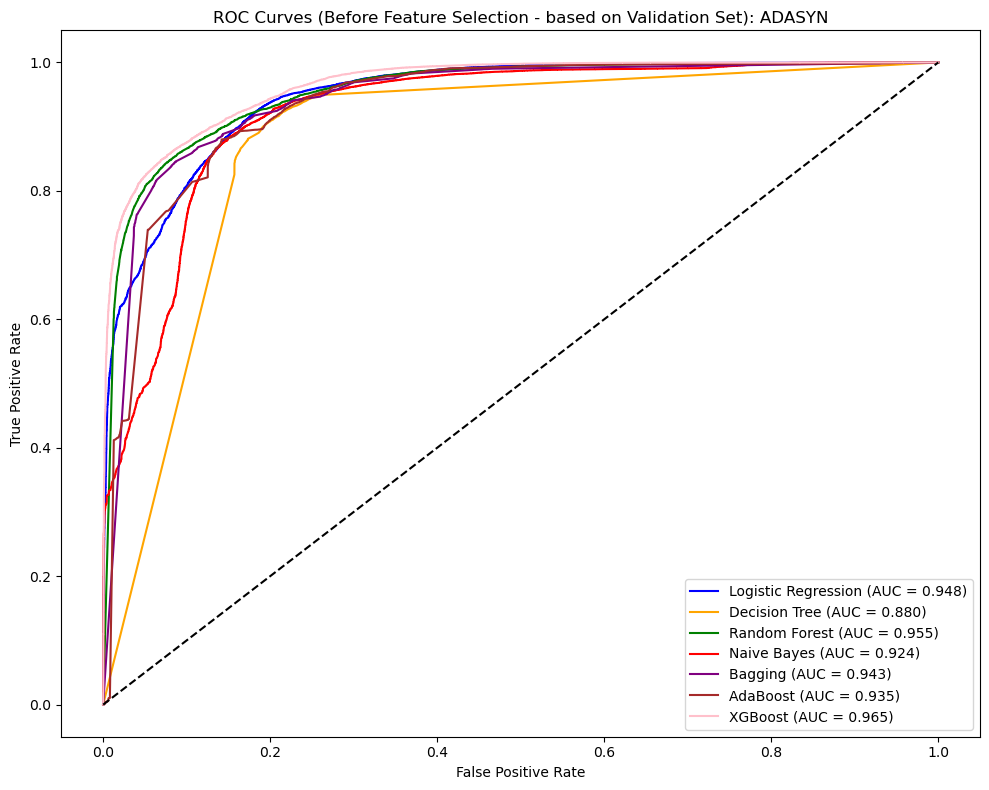

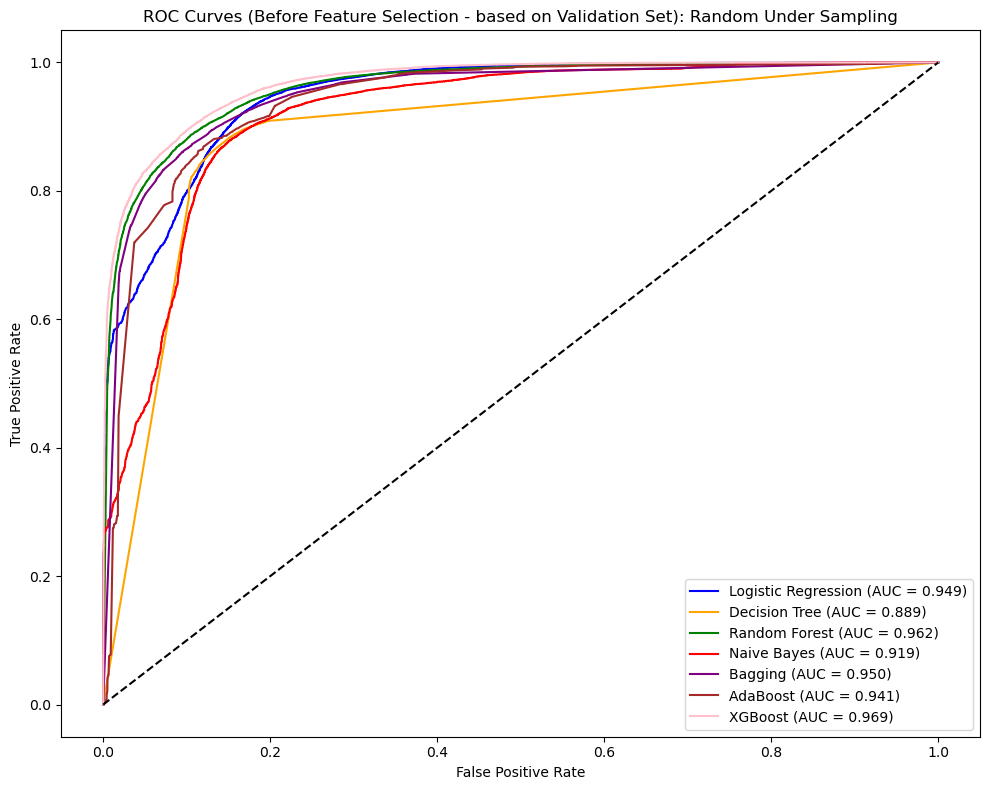

                                          Model  Accuracy  \
0              Logistic Regression - Unbalanced  0.912299   
1                   Logistic Regression - SMOTE  0.885978   
2                  Logistic Regression - ADASYN  0.851567   
3   Logistic Regression - Random Under Sampling  0.886146   
4                    Decision Tree - Unbalanced  0.894236   
5                         Decision Tree - SMOTE  0.884912   
6                        Decision Tree - ADASYN  0.867288   
7         Decision Tree - Random Under Sampling  0.864529   
8                    Random Forest - Unbalanced  0.914494   
9                         Random Forest - SMOTE  0.904459   
10                       Random Forest - ADASYN  0.887295   
11        Random Forest - Random Under Sampling  0.888738   
12                     Naive Bayes - Unbalanced  0.885560   
13                          Naive Bayes - SMOTE  0.883114   
14                         Naive Bayes - ADASYN  0.870884   
15          Naive Bayes 

In [44]:
# Resampling methods with Unbalanced as None
resampling_methods = {
    'Unbalanced': None,
    'SMOTE': SMOTE(random_state=1234),
    'ADASYN': ADASYN(random_state=1234),
    'Random Under Sampling': RandomUnderSampler(random_state=1234)
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=1234, max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=1234),
    'Random Forest': RandomForestClassifier(random_state=1234),
    'Naive Bayes': GaussianNB(),
    'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1234),
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=1234),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1234)
}

# Train and evaluate the initial model with resampling methods
results_df_initial, trained_models, predictions_initial = train_and_evaluate_model(models, X_train, y_train, X_val, y_val, resampling_methods)
print(results_df_initial)

**Comment**: 

- SMOTE is the best resampling method based on the f1-score (0.83) and precision (0.81), making it the most balanced method for predicting the minority class (Low ratings). It captures a good proportion of low ratings while also maintaining fewer false positives.

- Random Under-Sampling has the best recall (0.90), meaning it identifies more low ratings, but it sacrifices some precision.

It is most important for the company to correctly predict the actual low ratings, so that actions can be taken to intervene before dissatisfied customers leave and hence, minimize customer retention. Our focus is to correct identify True Negative and we will select the final model based on the highest recall of 'Low rating' class.

### **The best resampling method is Random Under Sampling method. Hence, moving forward, we will use only Random Sampling Method.**

### b. Model Performance - Training & Validation Errors

**<u>Why Log Loss is Chosen for Binary Classification<u>**

Log Loss, or Binary Cross-Entropy Loss, is the preferred loss function for our task of predicting high (1) and low (0) ratings because:

- **Probability Interpretation**: It evaluates predicted probabilities, rewarding confident predictions that align with actual ratings. This is essential since we want to accurately classify ratings as either high or low.

- **Sensitivity to Class Imbalance**: Log loss penalizes incorrect classifications more than simple accuracy metrics, making it effective in scenarios where one class may be underrepresented, such as predicting low ratings.

- **Gradient Descent Compatibility**: Being differentiable, log loss supports gradient-based optimization, helping our model learn effectively during training.

**<u>Insights from Training and Validation Errors<u>**

- **Training Errors:** Low log loss on the training set indicates that our model has learned to classify the ratings well based on the training data.

- **Validation Errors:** Low log loss on the validation set shows how well the model generalizes to unseen data, crucial for ensuring reliable predictions.

In [25]:
def collect_errors(trained_models, predictions, y_train, y_val, resampling_method_name):
    """
    Collect training and validation errors and accuracy for trained models using a specified resampling method.
    
    Parameters:
    - trained_models (dict): Dictionary of trained models.
    - predictions (dict): Dictionary of predictions for training and validation sets.
    - y_train (array-like): True labels for training.
    - y_val (array-like): True labels for validation.
    - resampling_method_name (str): Name of the resampling method used.
    
    Returns:
    - DataFrame: Table comparing training and validation errors and accuracies.
    """
    training_errors = []
    validation_errors = []
    accuracy_scores = []

    # Filter models trained with the specified resampling method
    for model_name, model in trained_models.items():
        if resampling_method_name not in model_name:
            # Skip models that do not match the specified resampling method name
            continue

        y_pred_train = predictions[model_name]['train']
        y_pred_val = predictions[model_name]['val']
        
        # Calculate log loss using probability predictions if available
        if hasattr(model, 'predict_proba'):
            y_pred_train_proba = model.predict_proba(X_train)[:, 1]
            y_pred_val_proba = model.predict_proba(X_val)[:, 1]
            training_errors.append(log_loss(y_train, y_pred_train_proba))
            validation_errors.append(log_loss(y_val, y_pred_val_proba))
        else:
            # If the model doesn't provide probability estimates, use the binary predictions
            training_errors.append(log_loss(y_train, y_pred_train))
            validation_errors.append(log_loss(y_val, y_pred_val))

        # Calculate accuracy score
        accuracy_val = accuracy_score(y_val, y_pred_val)
        accuracy_scores.append(accuracy_val)

    # Create a DataFrame with the collected results
    errors_df = pd.DataFrame({
        "Model": [name for name in trained_models.keys() if resampling_method_name in name],
        "Training Error (Log Loss)": training_errors,
        "Validation Error (Log Loss)": validation_errors,
        "Validation Accuracy": accuracy_scores,
        "Resampling Method": resampling_method_name
    })
    
    return errors_df


# Specify the resampling method as 'Random Under Sampling'
resampling_method = 'Random Under Sampling'

# Collect errors for models that were trained with 'Random Under Sampling' before feature selection
print(f"Training and Validation Errors - {resampling_method} (Before Feature Selection):")
errors_df_initial = collect_errors(trained_models, predictions_initial, y_train, y_val, resampling_method)
print(errors_df_initial)

Training and Validation Errors - Random Under Sampling (Before Feature Selection):
                                         Model  Training Error (Log Loss)  \
0  Logistic Regression - Random Under Sampling                   0.276806   
1        Decision Tree - Random Under Sampling                   1.712029   
2        Random Forest - Random Under Sampling                   0.217561   
3          Naive Bayes - Random Under Sampling                   1.080584   
4              Bagging - Random Under Sampling                   0.468308   
5             AdaBoost - Random Under Sampling                   0.402386   
6              XGBoost - Random Under Sampling                   0.208622   

   Validation Error (Log Loss)  Validation Accuracy      Resampling Method  
0                     0.277098             0.886166  Random Under Sampling  
1                     3.450270             0.864529  Random Under Sampling  
2                     0.345190             0.888738  Random Under Sam

**Comment**: The validation errors are small, meaning that the data does not show signs of overfitting, however, feature selection is performed to reduce noise in the dataset.

## 7.2 Feature Selection

### a. Forward Selection

In [26]:
# Initialize an empty dictionary to store SFS for each model
sfs_dict = {}

# Iterate over each model in the dictionary
for i, (model_name, model) in enumerate(models.items()):
    sfs_dict[model_name] = SFS(
        model,
        k_features=(1, X_train.shape[1]),
        forward=True,
        scoring="neg_log_loss",
        cv=5,
        verbose=1,
        n_jobs=-1
    )

# Display the SFS dictionary
sfs_dict

/opt/software/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


{'Logistic Regression': SequentialFeatureSelector(estimator=LogisticRegression(max_iter=500,
                                                        random_state=1234),
                           k_features=(1, 20), n_jobs=-1, scoring='neg_log_loss',
                           verbose=1),
 'Decision Tree': SequentialFeatureSelector(estimator=DecisionTreeClassifier(random_state=1234),
                           k_features=(1, 20), n_jobs=-1, scoring='neg_log_loss',
                           verbose=1),
 'Random Forest': SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=1234),
                           k_features=(1, 20), n_jobs=-1, scoring='neg_log_loss',
                           verbose=1),
 'Naive Bayes': SequentialFeatureSelector(estimator=GaussianNB(), k_features=(1, 20), n_jobs=-1,
                           scoring='neg_log_loss', verbose=1),
 'Bagging': SequentialFeatureSelector(estimator=BaggingClassifier(estimator=DecisionTreeClassifier(),
            

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.9s finished
Features: 1/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   11.4s finished
Features: 2/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   12.9s finished
Features: 3/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   15.0s finished
Features: 4/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   17.6s finished
Features: 5/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   17.3s finished
Features: 6/20[Parallel(n_jobs=-1)]: Using backe

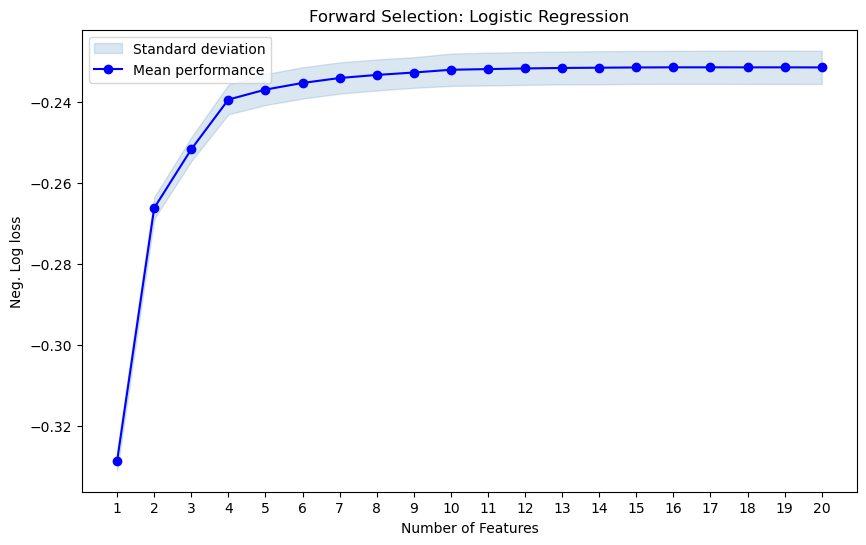

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.9s finished
Features: 1/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.1s finished
Features: 2/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.4s finished
Features: 3/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.8s finished
Features: 4/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.8s finished
Features: 5/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.8s finished
Features: 6/20[Parallel(n_jobs=-1)]: Using backe

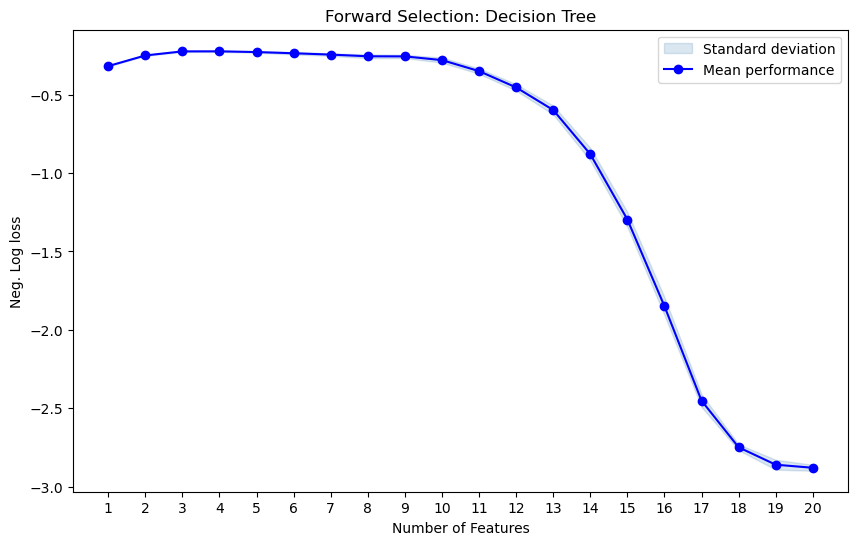

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.5s finished
Features: 1/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.9s finished
Features: 2/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.9s finished
Features: 3/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.9s finished
Features: 4/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.8s finished
Features: 5/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.8s finished
Features: 6/20[Parallel(n_jobs=-1)]: Using backe

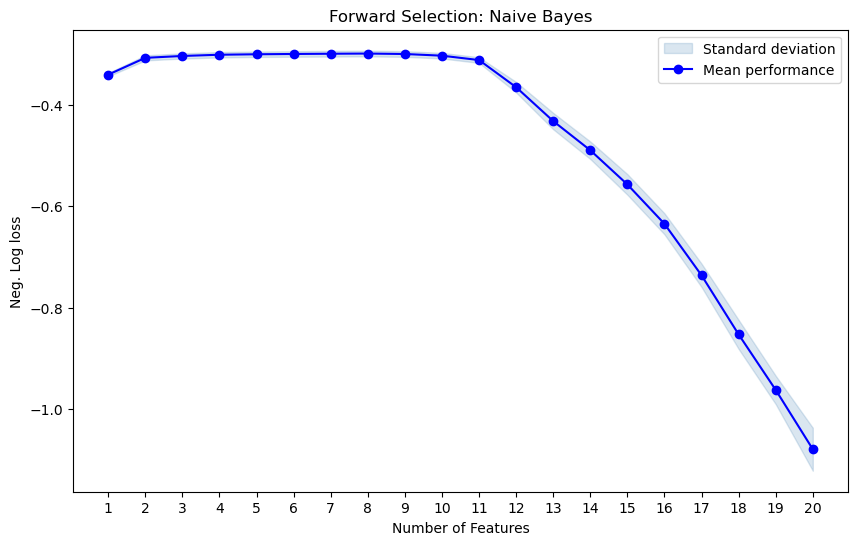

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.8s finished
Features: 1/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    7.3s finished
Features: 2/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    9.1s finished
Features: 3/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   12.0s finished
Features: 4/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:   11.9s finished
Features: 5/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   13.3s finished
Features: 6/20[Parallel(n_jobs=-1)]: Using backe

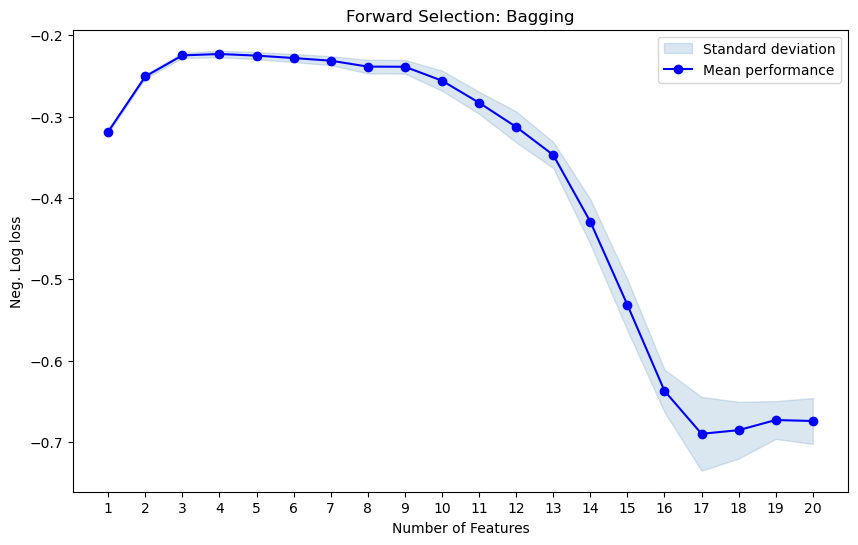

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   36.1s finished
Features: 1/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   43.4s finished
Features: 2/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.2min finished
Features: 3/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:  1.4min finished
Features: 4/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  1.3min finished
Features: 5/20[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.5min finished
Features: 6/20[Parallel(n_jobs=-1)]: Using backe

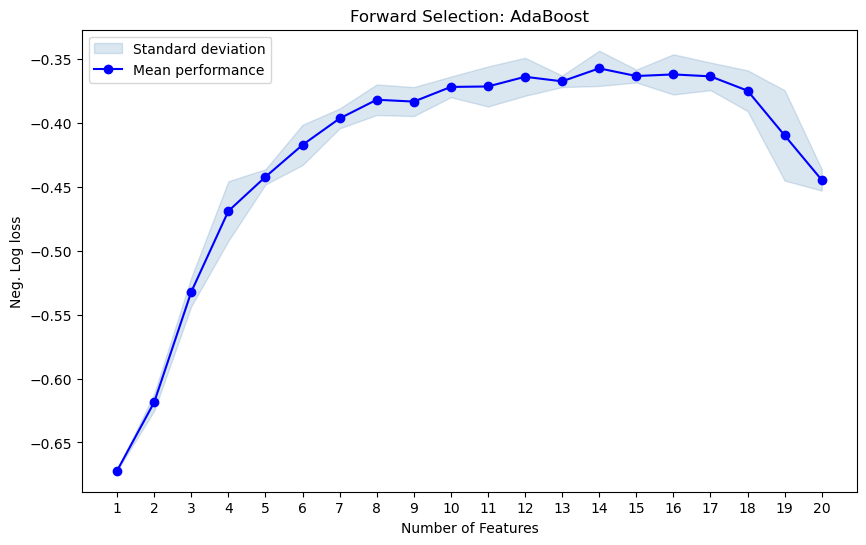

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/software/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/software/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/software/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/software/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):
/opt/software/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated

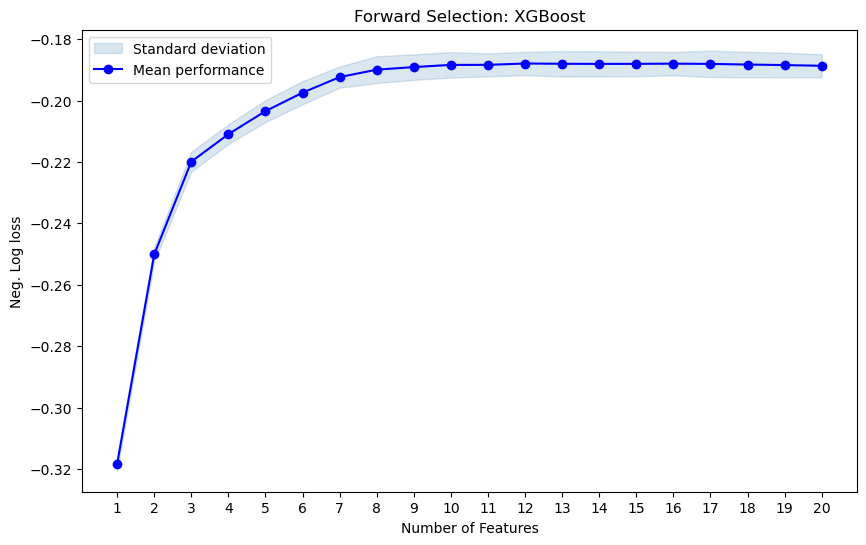

                 Model  Number of Selected Features (Forward Selection)  \
0  Logistic Regression                                               17   
1        Decision Tree                                                4   
2          Naive Bayes                                                8   
3              Bagging                                                4   
4             AdaBoost                                               14   
5              XGBoost                                               12   

   Cross-Validated Score (Neg. Log Loss)  \
0                              -0.231446   
1                              -0.224383   
2                              -0.298903   
3                              -0.223051   
4                              -0.357319   
5                              -0.187939   

                                   Selected Features  
0  hotel_class, no_of_amenities, no_of_attraction...  
1                   service, value, rooms, sentiment  


In [27]:
warnings.filterwarnings("ignore", category=UserWarning, module='xgboost')
warnings.filterwarnings("ignore", category=FutureWarning, module='xgboost')

# Initialize dictionaries and lists to store forward selection results
features_names_fwd = {}
n_features_fwd = []
k_score_fwd = []

# Exclude Random Forest from forward selection
sfs_dict_exclude_fwd = {key: value for key, value in sfs_dict.items() if key != 'Random Forest'}

# Perform forward selection for each model
for model_name, sfs in sfs_dict_exclude_fwd.items():
    # Update the selection strategy to forward
    sfs.forward = True
    
    # Fit the model using forward selection
    sfs.fit(X_train, y_train)

    # Plot the number of features during the selection process
    plot_sfs(sfs.get_metric_dict(), ylabel="Neg. Log loss", figsize=(10, 6))
    plt.title(f"Forward Selection: {model_name}")
    plt.legend(["Standard deviation", "Mean performance"])
    plt.show()

    # Store the results for each model
    features_names_fwd[model_name] = sfs.k_feature_names_
    n_features_fwd.append(len(sfs.k_feature_names_))
    k_score_fwd.append(sfs.k_score_)

# Create a DataFrame to show the results as a table
results_df_fwd = pd.DataFrame({
    'Model': list(sfs_dict_exclude_fwd.keys()),
    'Number of Selected Features (Forward Selection)': n_features_fwd,
    'Cross-Validated Score (Neg. Log Loss)': k_score_fwd,
    'Selected Features': [', '.join(features_names_fwd[model]) for model in sfs_dict_exclude_fwd.keys()]
})

# Display the DataFrame
print(results_df_fwd)

# Create a dictionary for selected features to feed into the evaluation function
selected_features_forward = {
    model_name: list(features_names_fwd[model_name]) 
    for model_name in sfs_dict_exclude_fwd.keys()
}

**Note: Random Forest is singled out since it takes a long time to load.**

In [31]:
results_df_fwd

Model  Number of Selected Features (Forward Selection)  \
0  Logistic Regression                                               17   
1        Decision Tree                                                4   
2          Naive Bayes                                                8   
3              Bagging                                                4   
4             AdaBoost                                               14   
5              XGBoost                                               12   

   Cross-Validated Score (Neg. Log Loss)  \
0                              -0.231446   
1                              -0.224383   
2                              -0.298903   
3                              -0.223051   
4                              -0.357319   
5                              -0.187939   

                                   Selected Features  
0  hotel_class, no_of_amenities, no_of_attraction...  
1                   service, value, rooms, sentiment  
2  no_of_amenities, dist_to_metro, no_of_attracti...  
3                   service, value, rooms, sentiment  
4  hotel_class, no_of_amenities, dist_to_metro, a...  
5  no_of_amenities, no_of_reviews, service, clean...

In [33]:
# Loop through each row in the DataFrame and print the model name along with its selected features
for index, row in results_df_fwd.iterrows():
    model_name = row['Model']
    selected_features = row['Selected Features']
    print(f"Model: {model_name}")
    print(f"Selected Features: {selected_features}\n")

Model: Logistic Regression
Selected Features: hotel_class, no_of_amenities, no_of_attractions, award, no_of_reviews, service, cleanliness, value, location, sleep_quality, rooms, check_in_front_desk, business_service, sentiment, price_level_expensive, price_level_low, price_level_very expensive

Model: Logistic Regression
Selected Features: service, value, rooms, sentiment

Model: Logistic Regression
Selected Features: no_of_amenities, dist_to_metro, no_of_attractions, no_of_reviews, value, rooms, price_level_expensive, price_level_very expensive

Model: Logistic Regression
Selected Features: service, value, rooms, sentiment

Model: Logistic Regression
Selected Features: hotel_class, no_of_amenities, dist_to_metro, award, no_of_reviews, service, cleanliness, value, location, sleep_quality, rooms, sentiment, price_level_expensive, price_level_moderate

Model: Logistic Regression
Selected Features: no_of_amenities, no_of_reviews, service, cleanliness, value, location, sleep_quality, rooms

### b. Backward Selection

In [29]:
sfs_dict_2= {}
for i, (model_name, model) in enumerate(models.items()):
        sfs_dict_2[model_name] = SFS(
            model,
            k_features=(1, X_train.shape[1]),
            forward= False,
            scoring="neg_log_loss",
            cv=5,
            verbose=1,
            n_jobs=-1
        )
sfs_dict_2

{'Logistic Regression': SequentialFeatureSelector(estimator=LogisticRegression(max_iter=500,
                                                        random_state=1234),
                           forward=False, k_features=(1, 20), n_jobs=-1,
                           scoring='neg_log_loss', verbose=1),
 'Decision Tree': SequentialFeatureSelector(estimator=DecisionTreeClassifier(random_state=1234),
                           forward=False, k_features=(1, 20), n_jobs=-1,
                           scoring='neg_log_loss', verbose=1),
 'Random Forest': SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=1234),
                           forward=False, k_features=(1, 20), n_jobs=-1,
                           scoring='neg_log_loss', verbose=1),
 'Naive Bayes': SequentialFeatureSelector(estimator=GaussianNB(), forward=False,
                           k_features=(1, 20), n_jobs=-1, scoring='neg_log_loss',
                           verbose=1),
 'Bagging': SequentialFeatu

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  4.4min finished
Features: 19/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:  3.9min finished
Features: 18/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  3.1min finished
Features: 17/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:  1.7min finished
Features: 16/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  1.6min finished
Features: 15/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.1min finished
Features: 14/1[Parallel(n_jobs=-1)]: Using backe

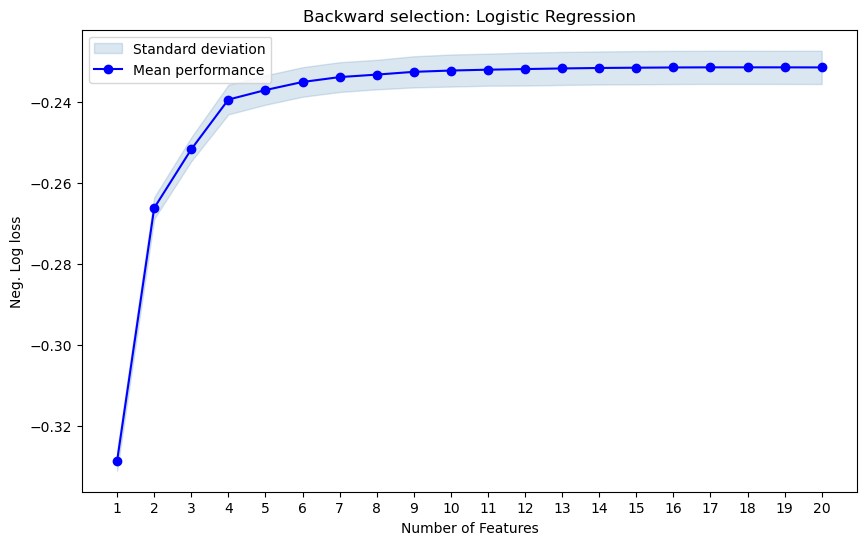

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   14.7s finished
Features: 19/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   12.9s finished
Features: 18/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   11.4s finished
Features: 17/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    9.9s finished
Features: 16/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    7.2s finished
Features: 15/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.9s finished
Features: 14/1[Parallel(n_jobs=-1)]: Using backe

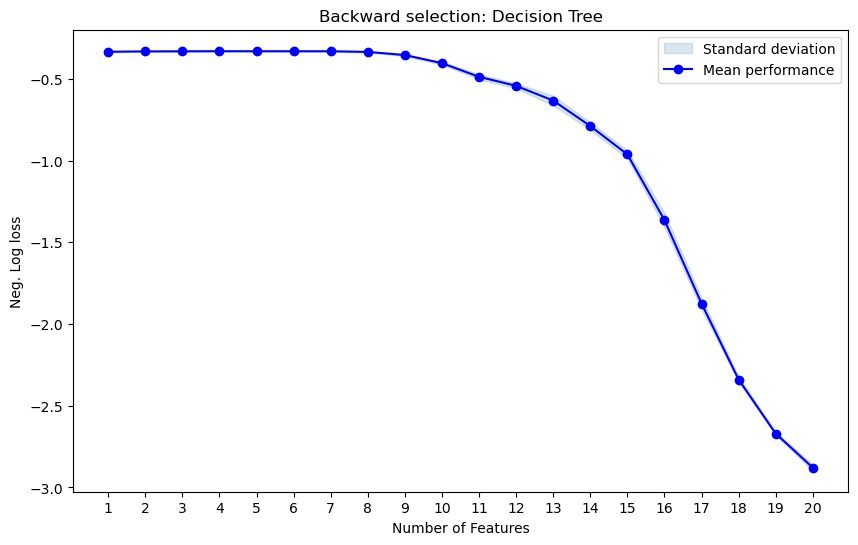

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.6s finished
Features: 19/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    1.5s finished
Features: 18/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    1.3s finished
Features: 17/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    1.2s finished
Features: 16/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    1.0s finished
Features: 15/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.0s finished
Features: 14/1[Parallel(n_jobs=-1)]: Using backe

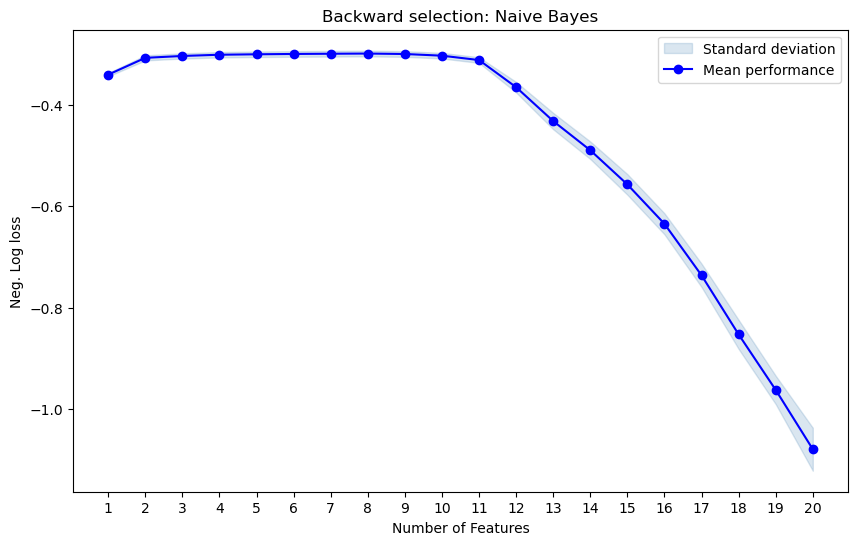

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.7min finished
Features: 19/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:  1.6min finished
Features: 18/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.5min finished
Features: 17/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:  1.5min finished
Features: 16/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  1.0min finished
Features: 15/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   59.9s finished
Features: 14/1[Parallel(n_jobs=-1)]: Using backe

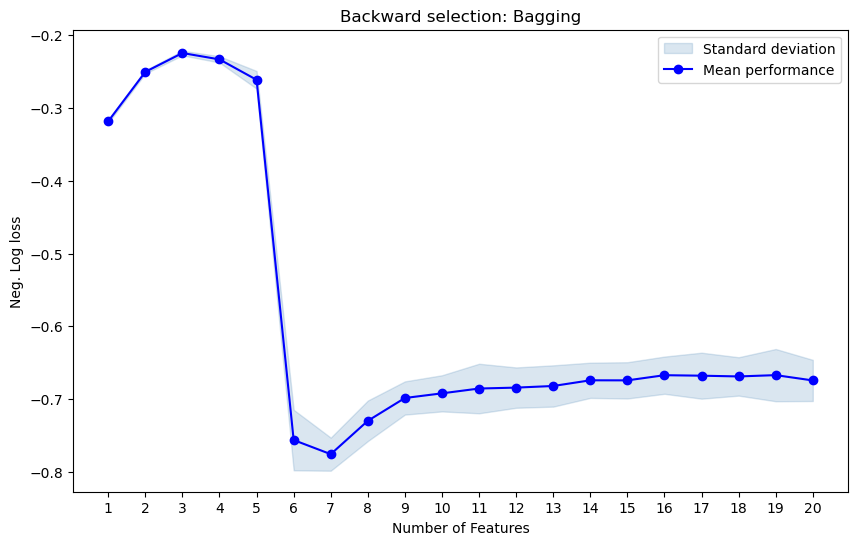

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.4min finished
Features: 19/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:  3.2min finished
Features: 18/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  3.3min finished
Features: 17/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:  3.2min finished
Features: 16/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  2.7min finished
Features: 15/1[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.6min finished
Features: 14/1[Parallel(n_jobs=-1)]: Using backe

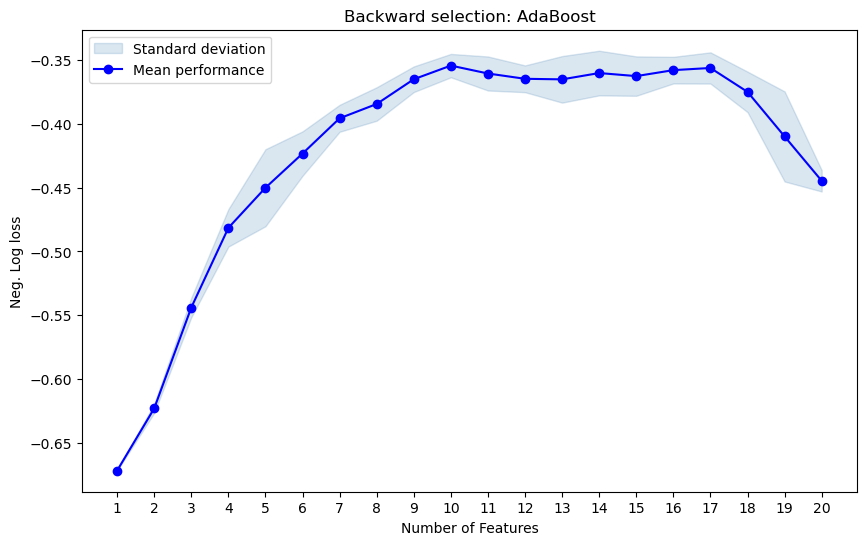

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/opt/software/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/software/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/software/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/software/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/opt/software/lib/python3.10/site-packages/xgboost/data.py:440: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.

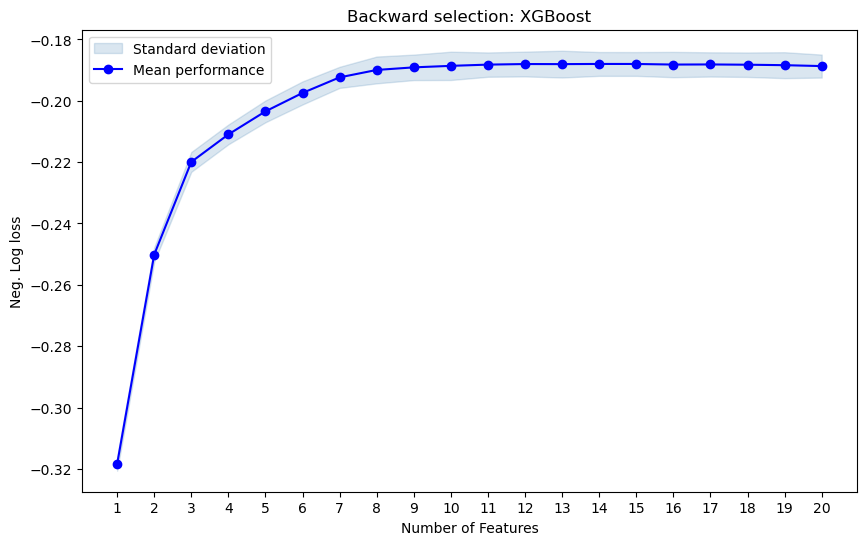

                 Model  Number of Selected Features (Backward Selection)  \
0  Logistic Regression                                                18   
1        Decision Tree                                                 4   
2          Naive Bayes                                                 8   
3              Bagging                                                 3   
4             AdaBoost                                                10   
5              XGBoost                                                14   

   Cross-Validated Score (Neg. Log Loss)  \
0                              -0.231451   
1                              -0.330043   
2                              -0.298903   
3                              -0.224736   
4                              -0.354147   
5                              -0.187993   

                                   Selected Features  
0  hotel_class, no_of_amenities, no_of_attraction...  
1  award, rooms, price_level_low, price_level_ve

In [34]:
# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module='xgboost')
warnings.filterwarnings("ignore", category=FutureWarning, module='xgboost')

# Initialize dictionaries and lists to store results
features_names_2 = {}
n_features_2 = []
k_score_2 = []

# Exclude Random Forest from backward selection
sfs_dict_exclude_2 = {key: value for key, value in sfs_dict_2.items() if key != 'Random Forest'}

# Perform backward selection for each model
for model_name, sfs in sfs_dict_exclude_2.items():
    sfs.fit(X_train, y_train)

    # Plot the number of features during selection
    plot_sfs(sfs.get_metric_dict(), ylabel="Neg. Log loss", figsize=(10, 6))
    plt.title(f"Backward selection: {model_name}")
    plt.legend(["Standard deviation", "Mean performance"])
    plt.show()

    # Store the results for each model
    features_names_2[model_name] = sfs.k_feature_names_
    n_features_2.append(len(sfs.k_feature_names_))
    k_score_2.append(sfs.k_score_)

# Create a DataFrame to show the results as a table
results_df_bwd = pd.DataFrame({
    'Model': list(sfs_dict_exclude_2.keys()),
    'Number of Selected Features (Backward Selection)': n_features_2,
    'Cross-Validated Score (Neg. Log Loss)': k_score_2,
    'Selected Features': [', '.join(features_names_2[model]) for model in sfs_dict_exclude_2.keys()]
})

# Display the DataFrame
print(results_df_bwd)

# Create a dictionary for selected features to feed into the evaluation function
selected_features_backward = {
    model_name: list(features_names_2[model_name]) 
    for model_name in sfs_dict_exclude_2.keys()
}

In [36]:
results_df_bwd

Model  Number of Selected Features (Backward Selection)  \
0  Logistic Regression                                                18   
1        Decision Tree                                                 4   
2          Naive Bayes                                                 8   
3              Bagging                                                 3   
4             AdaBoost                                                10   
5              XGBoost                                                14   

   Cross-Validated Score (Neg. Log Loss)  \
0                              -0.231451   
1                              -0.330043   
2                              -0.298903   
3                              -0.224736   
4                              -0.354147   
5                              -0.187993   

                                   Selected Features  
0  hotel_class, no_of_amenities, no_of_attraction...  
1  award, rooms, price_level_low, price_level_ver...  
2  no_of_amenities, dist_to_metro, no_of_attracti...  
3                              service, value, rooms  
4  no_of_amenities, dist_to_metro, no_of_reviews,...  
5  award, no_of_reviews, service, cleanliness, va...

In [35]:
# Loop through each row in the DataFrame and print the model name along with its selected features
for index, row in results_df_bwd.iterrows():
    model_name = row['Model']
    selected_features = row['Selected Features']
    print(f"Model: {model_name}")
    print(f"Selected Features: {selected_features}\n")

Model: Logistic Regression
Selected Features: hotel_class, no_of_amenities, no_of_attractions, award, no_of_reviews, service, cleanliness, value, sleep_quality, rooms, check_in_front_desk, business_service, sentiment, price_level_Not Specified, price_level_expensive, price_level_low, price_level_moderate, price_level_very expensive

Model: Decision Tree
Selected Features: award, rooms, price_level_low, price_level_very expensive

Model: Naive Bayes
Selected Features: no_of_amenities, dist_to_metro, no_of_attractions, no_of_reviews, value, rooms, price_level_expensive, price_level_very expensive

Model: Bagging
Selected Features: service, value, rooms

Model: AdaBoost
Selected Features: no_of_amenities, dist_to_metro, no_of_reviews, service, cleanliness, value, location, sleep_quality, rooms, sentiment

Model: XGBoost
Selected Features: award, no_of_reviews, service, cleanliness, value, location, sleep_quality, rooms, check_in_front_desk, business_service, sentiment, price_level_expensi

## Comparision Between Forward vs Backward Selection

In [54]:
def collect_errors_fs(trained_models, predictions, y_train, y_val, resampling_method):
    errors_list = []
    
    for model_name, model in trained_models.items():
        # Get the predictions for the training and validation sets
        y_train_pred = predictions[model_name]['train']
        y_val_pred = predictions[model_name]['val']
        
        # Calculate log loss for training and validation sets
        train_log_loss = log_loss(y_train, y_train_pred[:, 1])  
        val_log_loss = log_loss(y_val, y_val_pred[:, 1])
        
        # Calculate accuracy for validation set
        val_accuracy = accuracy_score(y_val, y_val_pred[:, 1] >= 0.5) 
        
        # Append the results to the list
        errors_list.append({
            'Model': model_name,
            'Training Error (Log Loss)': train_log_loss,
            'Validation Error (Log Loss)': val_log_loss,
            'Validation Accuracy': val_accuracy,
            'Resampling Method': resampling_method
        })
    
    # Create a DataFrame from the results
    return pd.DataFrame(errors_list)

In [58]:
# Train models using selected features from forward selection:

# Step 1: Create a dictionary for selected features to feed into the evaluation function
selected_features_forward = {
    row['Model']: row['Selected Features'].split(', ')  # Split the comma-separated features into a list
    for index, row in results_df_fwd.iterrows() # Iterate over each row in the DataFrame
}

# Step 2: Train models using selected features from forward selection
trained_models_fw = {}
predictions_fw = {}

for model_name, features in selected_features_forward.items():
    # Fit the model using the selected features
    model = models[model_name]
    model.fit(X_train[features], y_train)  # Train on selected features
    
    # Store predictions
    predictions_fw[model_name] = {
        'train': model.predict_proba(X_train[features]),
        'val': model.predict_proba(X_val[features])
    }
    trained_models_fw[model_name] = model

# Collect errors after forward feature selection
print(f"Training and Validation Errors - {resampling_method} (After Forward Feature Selection):")
errors_df_fw = collect_errors_fs(trained_models_fw, predictions_fw, y_train, y_val, resampling_method)
print(errors_df_fw)

Training and Validation Errors - Random Under Sampling (After Forward Feature Selection):
                 Model  Training Error (Log Loss)  \
0  Logistic Regression                   0.231307   
1        Decision Tree                   0.210126   
2          Naive Bayes                   0.298865   
3              Bagging                   0.210191   
4             AdaBoost                   0.298912   
5              XGBoost                   0.166930   

   Validation Error (Log Loss)  Validation Accuracy      Resampling Method  
0                     0.232540             0.912299  Random Under Sampling  
1                     0.219816             0.911400  Random Under Sampling  
2                     0.302055             0.894257  Random Under Sampling  
3                     0.219185             0.911107  Random Under Sampling  
4                     0.388652             0.901992  Random Under Sampling  
5                     0.188483             0.921456  Random Under Sampling  

In [60]:
# Train models using selected features from backward selection

# Step 1: Create a dictionary for selected features from results_df_bwd
selected_features_backward = {
    row['Model']: row['Selected Features'].split(', ')  # Split the comma-separated features into a list
    for index, row in results_df_bwd.iterrows()  # Iterate over each row in the DataFrame
}

# Step 2: Train models using selected features from backward selection
trained_models_bw = {}
predictions_bw = {}

for model_name, features in selected_features_backward.items():
    # Fit the model using the selected features
    model = models[model_name]
    model.fit(X_train[features], y_train)  # Train on selected features
    
    # Store predictions
    predictions_bw[model_name] = {
        'train': model.predict_proba(X_train[features]),
        'val': model.predict_proba(X_val[features])
    }
    trained_models_bw[model_name] = model

# Step 3: Collect errors after backward feature selection
print(f"Training and Validation Errors - {resampling_method} (After Backward Feature Selection):")
errors_df_bw = collect_errors_fs(trained_models_bw, predictions_bw, y_train, y_val, resampling_method)
print(errors_df_bw)

Training and Validation Errors - Random Under Sampling (After Backward Feature Selection):
                 Model  Training Error (Log Loss)  \
0  Logistic Regression                   0.231302   
1        Decision Tree                   0.329611   
2          Naive Bayes                   0.298865   
3              Bagging                   0.218707   
4             AdaBoost                   0.273930   
5              XGBoost                   0.168118   

   Validation Error (Log Loss)  Validation Accuracy      Resampling Method  
0                     0.232526             0.912424  Random Under Sampling  
1                     0.329833             0.861874  Random Under Sampling  
2                     0.302055             0.894257  Random Under Sampling  
3                     0.223354             0.904522  Random Under Sampling  
4                     0.372830             0.902745  Random Under Sampling  
5                     0.187797             0.922020  Random Under Sampling 

In [63]:
# Calculate improvements

# Filter out Random Forest from errors_df_initial
filtered_errors_df_initial = errors_df_initial[~errors_df_initial["Model"].str.contains("Random Forest")]

# Calculate improvements
improve_val_fw = errors_df_fw["Validation Accuracy"].values - filtered_errors_df_initial["Validation Accuracy"].values
improve_val_bw = errors_df_bw["Validation Accuracy"].values - filtered_errors_df_initial["Validation Accuracy"].values

# Create a summary DataFrame
summary = {
    "Model": filtered_errors_df_initial["Model"].values,
    "Validation Error (Before Selection)": filtered_errors_df_initial["Validation Error (Log Loss)"].values,
    "Validation Accuracy (Before Selection)": filtered_errors_df_initial["Validation Accuracy"].values,
    "Validation Error (After Forward Selection)": errors_df_fw["Validation Error (Log Loss)"].values,
    "Validation Accuracy (After Forward Selection)": errors_df_fw["Validation Accuracy"].values,
    "Validation Improvement (Forward)": improve_val_fw,
    "Validation Error (After Backward Selection)": errors_df_bw["Validation Error (Log Loss)"].values,
    "Validation Accuracy (After Backward Selection)": errors_df_bw["Validation Accuracy"].values,
    "Validation Improvement (Backward)": improve_val_bw,
}

summary_df = pd.DataFrame(summary)
summary_df

Model  \
0  Logistic Regression - Random Under Sampling   
1        Decision Tree - Random Under Sampling   
2          Naive Bayes - Random Under Sampling   
3              Bagging - Random Under Sampling   
4             AdaBoost - Random Under Sampling   
5              XGBoost - Random Under Sampling   

   Validation Error (Before Selection)  \
0                             0.277098   
1                             3.450270   
2                             1.083560   
3                             0.831836   
4                             0.477433   
5                             0.226135   

   Validation Accuracy (Before Selection)  \
0                                0.886166   
1                                0.864529   
2                                0.882947   
3                                0.878097   
4                                0.877219   
5                                0.897309   

   Validation Error (After Forward Selection)  \
0                                    0.232540   
1                                    0.219816   
2                                    0.302055   
3                                    0.219185   
4                                    0.388652   
5                                    0.188483   

   Validation Accuracy (After Forward Selection)  \
0                                       0.912299   
1                                       0.911400   
2                                       0.894257   
3                                       0.911107   
4                                       0.901992   
5                                       0.921456   

   Validation Improvement (Forward)  \
0                          0.026133   
1                          0.046871   
2                          0.011310   
3                          0.033011   
4                          0.024774   
5                          0.024147   

   Validation Error (After Backward Selection)  \
0                                     0.232526   
1                                     0.329833   
2                                     0.302055   
3                                     0.223354   
4                                     0.372830   
5                                     0.187797   

   Validation Accuracy (After Backward Selection)  \
0                                        0.912424   
1                                        0.861874   
2                                        0.894257   
3                                        0.904522   
4                                        0.902745   
5                                        0.922020   

   Validation Improvement (Backward)  
0                           0.026258  
1                          -0.002655  
2                           0.011310  
3                           0.026425  
4                           0.025526  
5                           0.024711

### Comment

**1. Overall Improvement**
Most models show an improvement in both validation error and accuracy after applying feature selection methods. This indicates that selecting relevant features helps in enhancing the model's predictive performance.

**2. Forward vs. Backward Selection**
For several models, the improvements in validation accuracy and error are comparable between forward and backward selection. However, some models (like **Decision Tree**) show a drop in accuracy after backward selection, indicating that backward elimination may have removed important features for that particular model.

**3. Best Performers**
- **XGBoost** stands out with one of the lowest validation errors (0.226135) before selection and shows a significant improvement in accuracy after both forward (92.15%) and backward selection (92.20%).
- **Logistic Regression** also improves significantly, showing the effectiveness of feature selection for linear models.

**4. Models with Less Improvement**
**Naive Bayes** and **Decision Tree** display smaller improvements, suggesting that these models may be less sensitive to feature selection compared to others.

**5. Consistency**
Most models show consistent improvement across both selection methods, indicating that feature selection generally enhances model performance. The results suggest that retaining the most informative features is beneficial across various algorithms.

### Conclusion
In general, feature selection leads to better validation performance for most models evaluated. While the Backward Selection method shows slight improvements for some models, the choice between forward and backward selection may depend on specific model behaviors and their sensitivity to feature changes. 

**Therefore, we will use the selected features from the backward method.**


## 7.3. After Feature Selection (Using selected features from BackWard Feature Selection)

In [ ]:
# Create a dictionary to store selected features for each model
selected_features_dict = {
    row['Model']: row['Selected Features'].split(', ')  # Split the string into a list
    for index, row in results_df_bwd.iterrows()  # Iterate over each row in the DataFrame
}

{'Logistic Regression': ['hotel_class', 'no_of_amenities', 'no_of_attractions', 'award', 'no_of_reviews', 'service', 'cleanliness', 'value', 'sleep_quality', 'rooms', 'check_in_front_desk', 'business_service', 'sentiment', 'price_level_Not Specified', 'price_level_expensive', 'price_level_low', 'price_level_moderate', 'price_level_very expensive'], 'Decision Tree': ['award', 'rooms', 'price_level_low', 'price_level_very expensive'], 'Naive Bayes': ['no_of_amenities', 'dist_to_metro', 'no_of_attractions', 'no_of_reviews', 'value', 'rooms', 'price_level_expensive', 'price_level_very expensive'], 'Bagging': ['service', 'value', 'rooms'], 'AdaBoost': ['no_of_amenities', 'dist_to_metro', 'no_of_reviews', 'service', 'cleanliness', 'value', 'location', 'sleep_quality', 'rooms', 'sentiment'], 'XGBoost': ['award', 'no_of_reviews', 'service', 'cleanliness', 'value', 'location', 'sleep_quality', 'rooms', 'check_in_front_desk', 'business_service', 'sentiment', 'price_level_expensive', 'price_level_moderate', 'price_level_very expensive']}

/opt/software/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


<Figure size 1000x800 with 0 Axes>

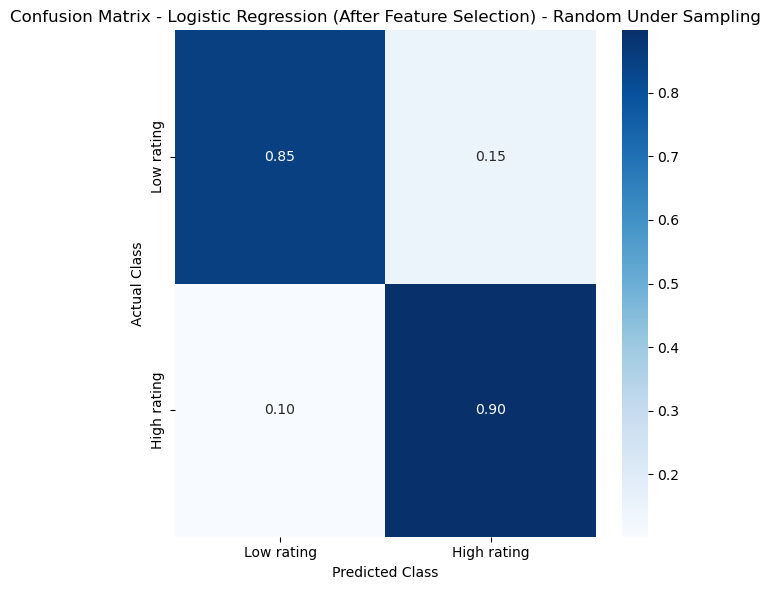

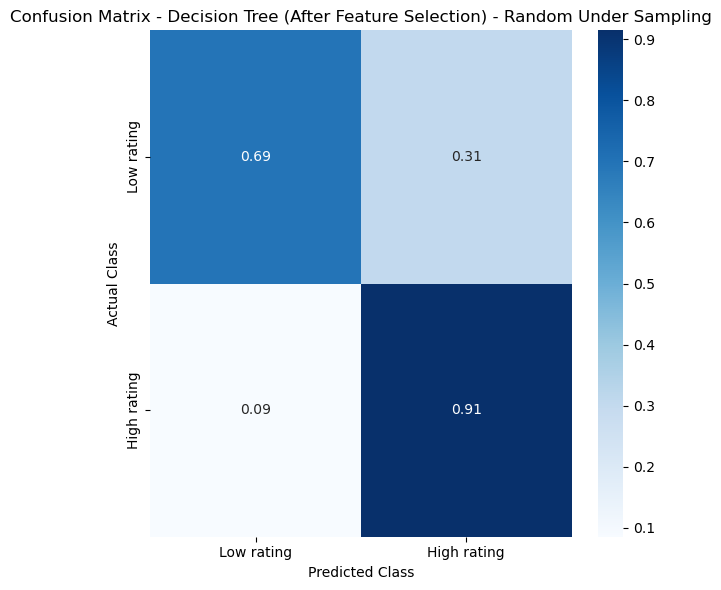

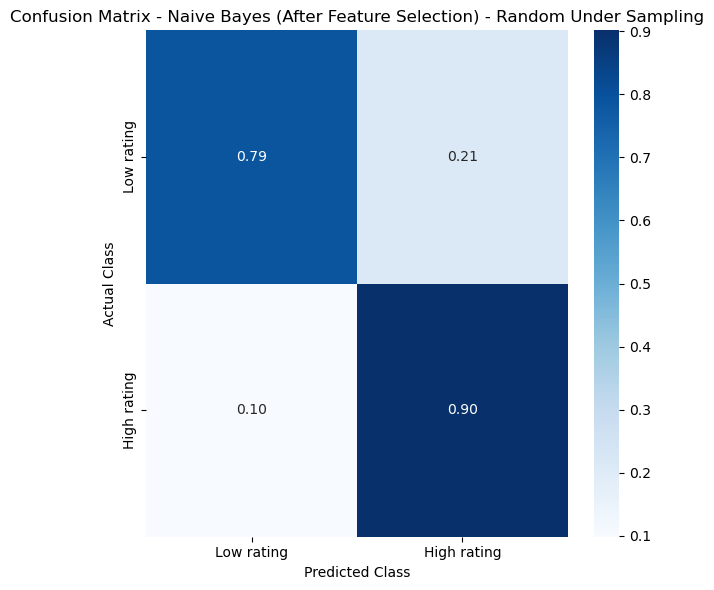

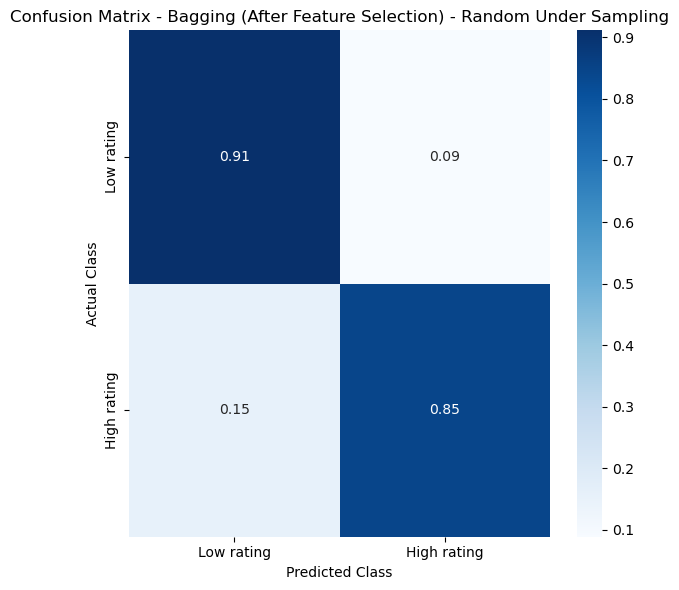

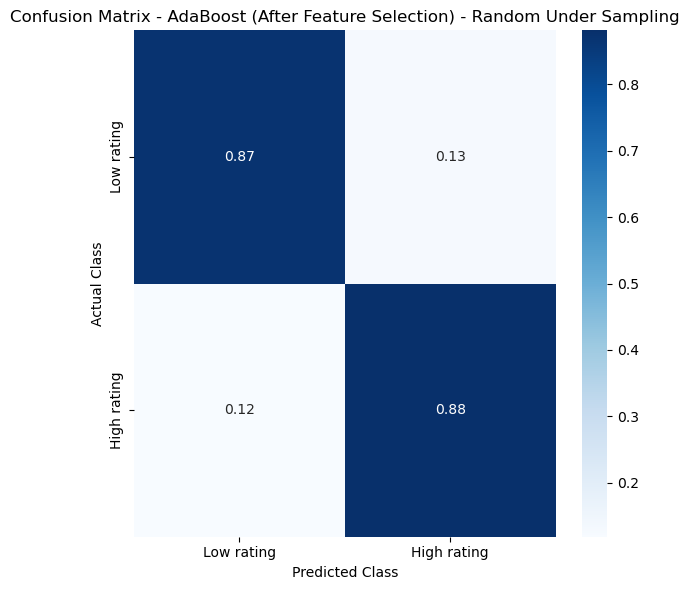

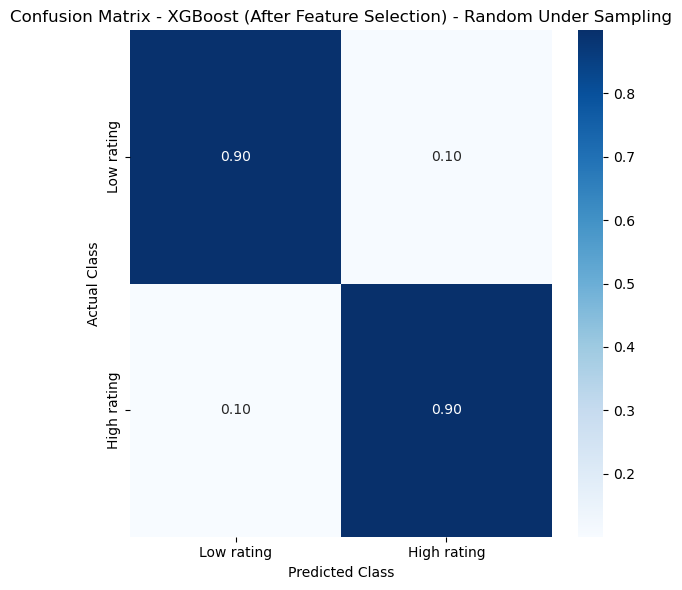

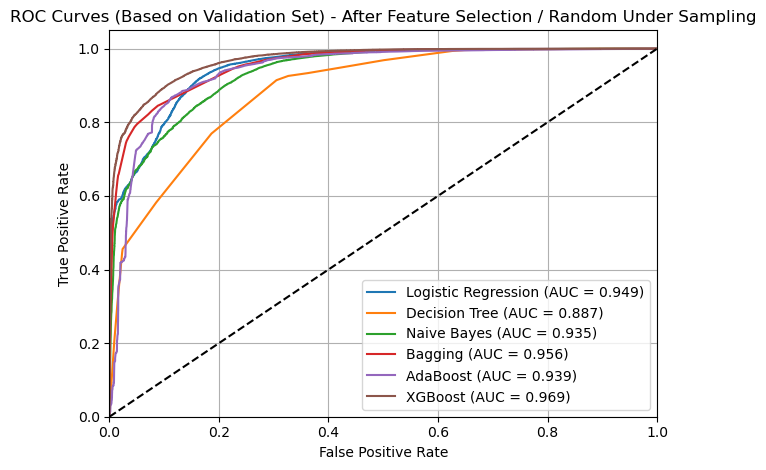

                 Model  Accuracy  Precision ("low ratings" class)  \
0  Logistic Regression  0.886062                         0.739951   
1        Decision Tree  0.858738                         0.734933   
2          Naive Bayes  0.872285                         0.731007   
3              Bagging  0.862104                         0.667530   
4             AdaBoost  0.878159                         0.713630   
5              XGBoost  0.898543                         0.752401   

   Recall ("low ratings" class)  F1-score ("low ratings" class)  
0                      0.850822                        0.791523  
1                      0.694984                        0.714400  
2                      0.787336                        0.758126  
3                      0.911595                        0.770702  
4                      0.869737                        0.783988  
5                      0.895641                        0.817796  


In [38]:
import warnings
# Suppress FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

def train_and_evaluate_with_visualizations(models, X_train, y_train, X_val, y_val, resampler, selected_features):
    """
    Train and evaluate models with visualizations (ROC curves and confusion matrices) after feature selection.
    
    Parameters:
    - models (dict): Dictionary of models to evaluate.
    - X_train (array-like): Feature matrix for training.
    - y_train (array-like): True labels for training.
    - X_val (array-like): Feature matrix for validation.
    - y_val (array-like): True labels for validation.
    - resampler (object): Resampling method to apply.
    - selected_features (dict): Dictionary containing selected features for each model.
    
    Returns:
    - DataFrame: Table containing evaluation metrics for each model.
    - dict: Dictionary of trained models.
    - dict: Dictionary of predictions for training and validation sets.
    """
    results = []
    trained_models = {}
    predictions = {}
    
    # Resample the training data
    X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)

    # Prepare to plot ROC curves
    plt.figure(figsize=(10, 8))

    # Train each model
    for model_name, model in models.items():
        # Select features for the current model
        selected_cols = selected_features[model_name]
        X_train_selected = X_train_resampled[selected_cols]
        X_val_selected = X_val[selected_cols]

        # Train the model on the selected features
        model.fit(X_train_selected, y_train_resampled)

        # Predict on the validation set
        y_pred_val = model.predict(X_val_selected)
        y_pred_train = model.predict(X_train_selected)

        # Store predictions
        trained_models[model_name] = model
        predictions[model_name] = {'train': y_pred_train, 'val': y_pred_val}

        # Compute the confusion matrix for the validation set
        cm = confusion_matrix(y_val, y_pred_val, normalize='true')
        
        # Plot confusion matrix for each model
        plt.figure(figsize=(6, 6))
        sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues',
                    xticklabels=["Low rating", "High rating"],
                    yticklabels=["Low rating", "High rating"])
        plt.title(f'Confusion Matrix - {model_name} (After Feature Selection) - Random Under Sampling')
        plt.xlabel("Predicted Class")
        plt.ylabel("Actual Class")
        plt.tight_layout()
        plt.show()


        # Compute evaluation metrics
        metrics = {
            'Model': model_name,
            'Accuracy': accuracy_score(y_val, y_pred_val),
            'Precision ("low ratings" class)': precision_score(y_val, y_pred_val, pos_label=0),
            'Recall ("low ratings" class)': recall_score(y_val, y_pred_val, pos_label=0),
            'F1-score ("low ratings" class)': f1_score(y_val, y_pred_val, pos_label=0),
        }
        results.append(metrics)

    # Define a list of distinct colors for each model
    colors = [
        'blue', 'orange', 'red', 'purple', 'brown', 'pink'
    ]
    # Plot AUC curve:
    for model_name, model in models.items():
        
        # Select features for the current model
        selected_cols = selected_features[model_name]
        X_train_selected = X_train_resampled[selected_cols]
        X_val_selected = X_val[selected_cols]

        # Train the model on the selected features
        model.fit(X_train_selected, y_train_resampled)

        # Predict on the validation set
        y_pred_val = model.predict(X_val_selected)
        y_pred_train = model.predict(X_train_selected)

        # Store predictions
        trained_models[model_name] = model
        predictions[model_name] = {'train': y_pred_train, 'val': y_pred_val}
        
        y_pred_proba = model.predict_proba(X_val_selected)[:, 1] if hasattr(model, 'predict_proba') else None

        if y_pred_proba is not None:
            fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')
            
    # Customize the ROC curve plot
    plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
    plt.xlim([0.0, 1.0])  # Set x-axis limits
    plt.ylim([0.0, 1.05])  # Set y-axis limits
    plt.title('ROC Curves (Based on Validation Set) - After Feature Selection / Random Under Sampling')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()  # Add grid for better readability
    plt.tight_layout()
    plt.show()

    # Create a DataFrame from the results
    results_df = pd.DataFrame(results)
    return results_df, trained_models, predictions

# Only use Random Under Sampling:
resampling_method = RandomUnderSampler(random_state=1234)

# Define your models as before
models = {
    'Logistic Regression': LogisticRegression(random_state=1234, max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=1234),
    'Naive Bayes': GaussianNB(),
    'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1234),
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=1234),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1234)
}

# Train and evaluate with selected features from Forward Selection
results_df_selected, trained_models_selected, predictions_selected = train_and_evaluate_with_visualizations(
    models, X_train, y_train, X_val, y_val, resampling_method, selected_features_dict
)

# Display results DataFrame
print(results_df_selected)

### <u>Comment<u>:

Feature selection improved the performance of several models using **Random Under Sampling**. Notably, **XGBoost** showed the most significant improvement, with its **accuracy** increasing from **0.897** to **0.899** and the **F1-score** for the "low ratings" class rising from **0.816** to **0.818**. For **XGBoost**, even though the overall **AUC** and  **recall rate of low rating class** remained nearly the same, it still indicates a meaningful improvement in detecting more low ratings. This suggests that feature selection helped the model become more sensitive to the **minority class**, potentially leading to more effective interventions based on predicted low ratings.

### Hence, our final model selection is **XGBoost** resampled using **Random Under Sampling** and selected features from **Backward selection**.

----

# 8. Hyperparameter tuning

## a. Grid Search - XGradientBoost

In [46]:
# Suppress FutureWarnings
warnings.simplefilter('ignore', category=FutureWarning)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Define the model for Grid Search
xgb_model = XGBClassifier(random_state=1234)

# Random Under Sampling
rus = RandomUnderSampler(random_state=1234)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, verbose=1, n_jobs=-1)
grid_search = grid_search.fit(X_train_resampled, y_train_resampled)

# Print best parameters from Grid Search
print("Best parameters from Grid Search: ", grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/opt/software/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/software/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/opt/software/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/opt/software/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/softwa

Best parameters from Grid Search:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


Best parameters from Grid Search:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}

## b. Bayesian Search - XGradientBoost

In [ ]:
# pip install scikit-optimize

In [47]:
# Suppress FutureWarnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Define the parameter grid for Bayesian Optimization
param_grid = {
    'n_estimators': (100, 500),  # Range for n_estimators
    'max_depth': (3, 10),        # Range for max_depth
    'learning_rate': (0.01, 0.3, 'uniform'),  # Uniform distribution for learning_rate
    'subsample': (0.5, 1.0),     # Range for subsample
    'colsample_bytree': (0.5, 1.0)  # Range for colsample_bytree
}

# Define the model for Bayesian Optimization
xgb_model = XGBClassifier(random_state=1234)

# Random Under Sampling
rus = RandomUnderSampler(random_state=1234)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Perform Bayesian Optimization
bayes_search = BayesSearchCV(estimator=xgb_model,
                              search_spaces=param_grid,
                              scoring='roc_auc',
                              n_iter=50,
                              cv=5,
                              n_jobs=-1,
                              random_state=1234)
bayes_search = bayes_search.fit(X_train_resampled, y_train_resampled)

best_params_bayes = bayes_search.best_params_

# Print best parameters from Bayesian Optimization
print("Best parameters from Bayesian Optimization: ", best_params_bayes)

/opt/software/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/software/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/opt/software/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/opt/software/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/softwa

Best parameters from Bayesian Optimization:  OrderedDict([('colsample_bytree', 0.5), ('learning_rate', 0.05418742280426649), ('max_depth', 6), ('n_estimators', 350), ('subsample', 0.5)])


Best parameters from Bayesian Optimization:  OrderedDict([('colsample_bytree', 0.5), ('learning_rate', 0.05418742280426649), ('max_depth', 6), ('n_estimators', 350), ('subsample', 0.5)])

## Comparison Model Performance using Default Hyperparameters vs Optimized Hyperparameters (based on Validation Test)

/opt/software/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/software/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/opt/software/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/opt/software/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/softwa

Comparison of XGBoost models with Default hyperparameters vs Optimized hyperparameters / Random Under Sampling (Based on Validation set):


/opt/software/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/software/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/opt/software/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/opt/software/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/softwa

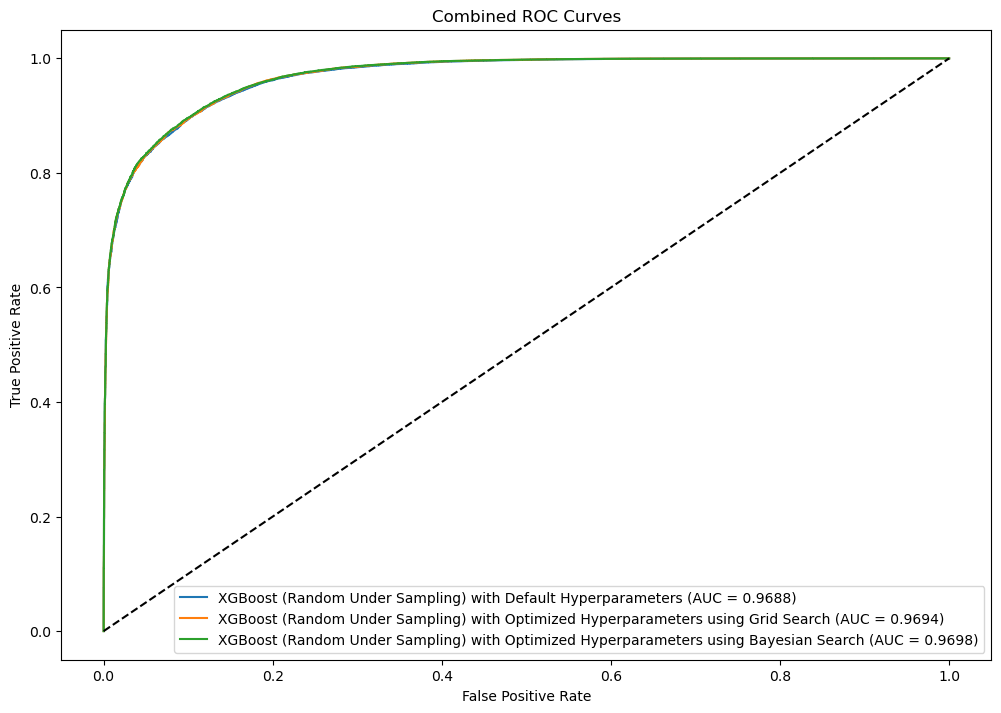

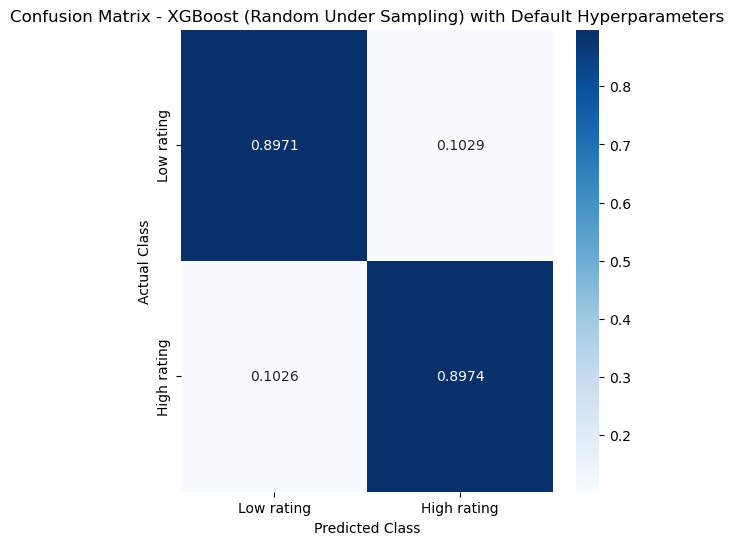

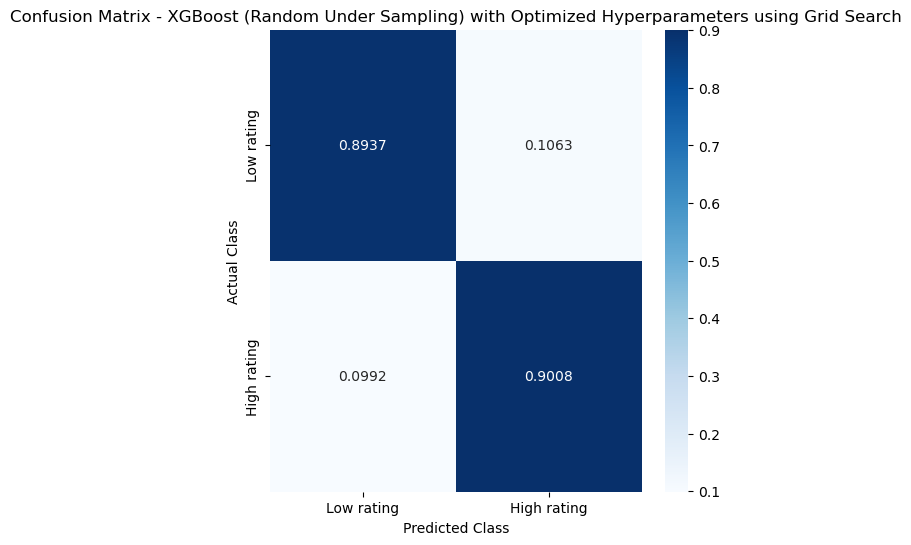

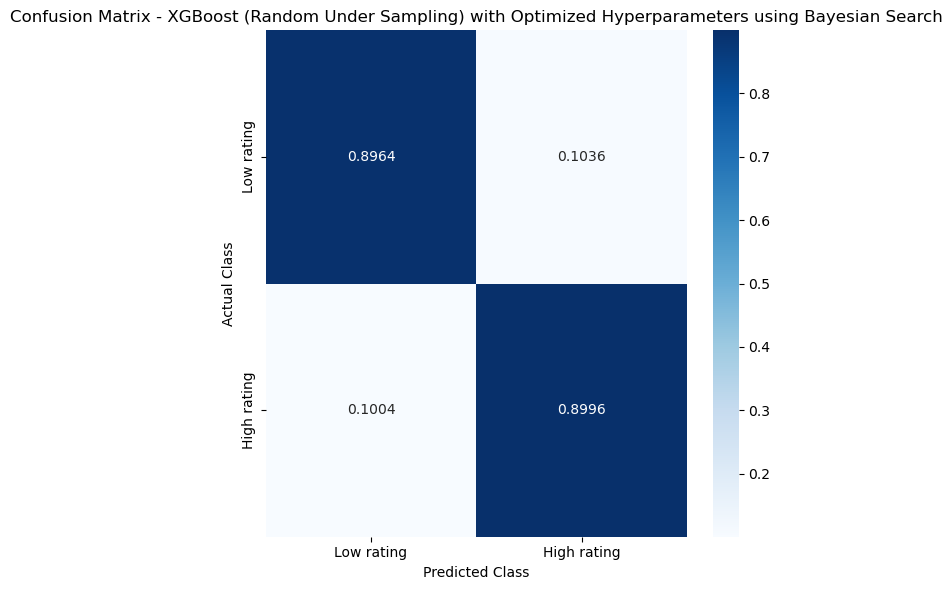

In [18]:
# Fit the default XGBoost model with Random Under Sampling
xgb_model = XGBClassifier(random_state=1234)
xgb_model.fit(X_train_resampled, y_train_resampled)  # Fit the default model

# Combine models for evaluation
models = {
    'XGBoost (Random Under Sampling) with Default Hyperparameters': xgb_model,  # Default model
    'XGBoost (Random Under Sampling) with Optimized Hyperparameters using Grid Search': grid_search.best_estimator_,  # Grid Search best model
    'XGBoost (Random Under Sampling) with Optimized Hyperparameters using Bayesian Search': bayes_search.best_estimator_  # Bayesian Search best model
}

def evaluate_models(models, X_test, y_test):
    plt.figure(figsize=(12, 18))  # Adjust figure size for readability

    # Plot ROC curve
    plt.subplot(2, 1, 1)  # First row for the ROC curve
    for model_name, model in models.items():
        # Predict probabilities for ROC curve
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})')

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
    plt.title('Combined ROC Curves')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

    # Confusion Matrices: one matrix per row
    for i, (model_name, model) in enumerate(models.items()):
        plt.figure(figsize=(6, 6))  # Separate figure for each confusion matrix

        # Predict labels
        y_pred_val = model.predict(X_val)

        # Compute confusion matrix
        cm = confusion_matrix(y_val, y_pred_val, normalize='true')

        # Plot confusion matrix
        sns.heatmap(cm, annot=True, fmt=".4f", cmap='Blues',
                    xticklabels=["Low rating", "High rating"],
                    yticklabels=["Low rating", "High rating"])
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel("Predicted Class")
        plt.ylabel("Actual Class")

    plt.tight_layout()  # Adjust layout
    plt.show()

# Evaluate models after tuning
print("Comparison of XGBoost models with Default hyperparameters vs Optimized hyperparameters / Random Under Sampling (Based on Validation set):")
evaluate_models(models, X_val, y_val)

**Conclusion**: The use of Bayesian Search enhances the model's performance, particularly in predicting True Negative cases (actual low ratings), resulting in an increase in the True Negative rate from 0.9007 to 0.9016 when compared to the model with default hyperparameters.

The optimal parameters obtained from Bayesian Optimization are as follows:

-----

# 9. Final Model Evaluation - Based on Test Set

/opt/software/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/software/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/opt/software/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/opt/software/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
/opt/softwa

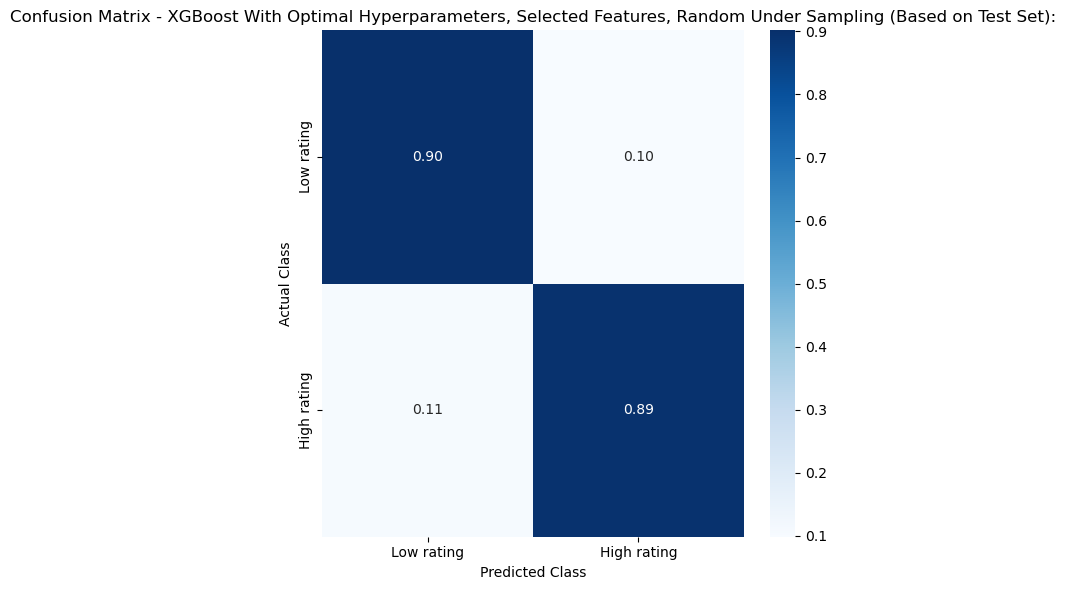

/opt/software/lib/python3.10/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/opt/software/lib/python3.10/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/opt/software/lib/python3.10/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/opt/software/lib/python3.10/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


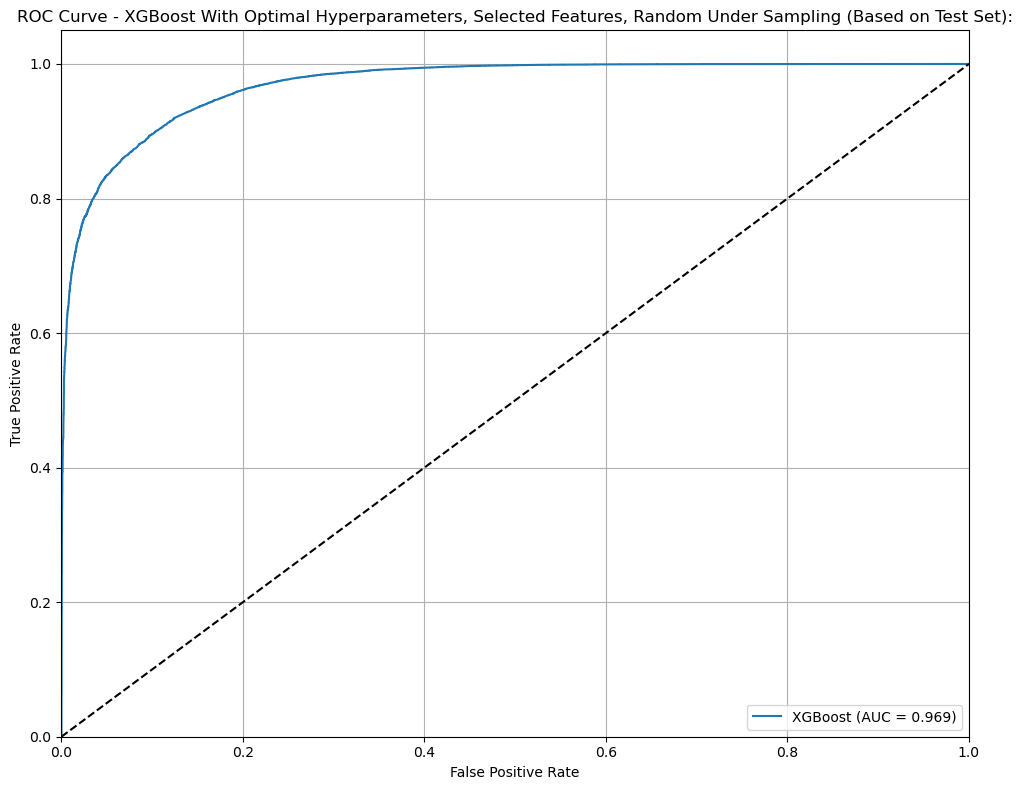

{'Model': 'XGBoost (Optimal Hyperparameters)', 'Accuracy': 0.8960990090730443, 'Precision ("low ratings" class)': 0.7438610771944105, 'Recall ("low ratings" class)': 0.9018092105263158, 'F1-score ("low ratings" class)': 0.8152553713478552}


In [25]:
def evaluate_on_test_set_with_hyperparameters(X_train, y_train, X_test, y_test, resampler, selected_features):
    """
    Train and evaluate the XGBoost model with optimal hyperparameters, 
    including visualizations (ROC curves and confusion matrices) on the test set.
    
    Parameters:
    - X_train (array-like): Feature matrix for training.
    - y_train (array-like): True labels for training.
    - X_test (array-like): Feature matrix for testing.
    - y_test (array-like): True labels for testing.
    - resampler (object): Resampling method to apply.
    - selected_features (list): List of selected features for the model.
    
    Returns:
    - dict: Trained XGBoost model.
    - dict: Predictions for the training and testing sets.
    """
    # Define the optimal parameters for XGBoost (with Bayesian)
    optimal_params = best_params_bayes
    
    # Resample the training data
    X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)

    # Select the features for the model
    X_train_selected = X_train_resampled[selected_features]
    X_test_selected = X_test[selected_features]
    
    # Initialize the XGBoost model with the optimal parameters
    model = XGBClassifier(**optimal_params)

    # Train the model on the selected features
    model.fit(X_train_selected, y_train_resampled)

    # Predict on the training and test sets
    y_pred_train = model.predict(X_train_selected)
    y_pred_test = model.predict(X_test_selected)

    # Store predictions
    predictions = {'train': y_pred_train, 'test': y_pred_test}

    # Compute the confusion matrix for the test set
    cm = confusion_matrix(y_test, y_pred_test, normalize='true')
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues',
                xticklabels=["Low rating", "High rating"],
                yticklabels=["Low rating", "High rating"])
    plt.title(f'Confusion Matrix - XGBoost With Optimal Hyperparameters, Selected Features, Random Under Sampling (Based on Test Set):')
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.tight_layout()
    plt.show()

    # Compute evaluation metrics
    metrics = {
        'Model': 'XGBoost (Optimal Hyperparameters)',
        'Accuracy': accuracy_score(y_test, y_pred_test),
        'Precision ("low ratings" class)': precision_score(y_test, y_pred_test, pos_label=0),
        'Recall ("low ratings" class)': recall_score(y_test, y_pred_test, pos_label=0),
        'F1-score ("low ratings" class)': f1_score(y_test, y_pred_test, pos_label=0),
    }
    
    # Plot ROC Curve
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test_selected)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(10, 8))
        plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.3f})')
        plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
        plt.xlim([0.0, 1.0])  # Set x-axis limits
        plt.ylim([0.0, 1.05])  # Set y-axis limits
        plt.title('ROC Curve - XGBoost With Optimal Hyperparameters, Selected Features, Random Under Sampling (Based on Test Set):')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.grid()
        plt.tight_layout()
        plt.show()

    return model, predictions, metrics

# Apply the evaluation function
resampling_method = RandomUnderSampler(random_state=1234)
selected_features = selected_features_dict['XGBoost']

# Evaluate the XGBoost model on the test set using the optimal parameters
model, predictions, metrics = evaluate_on_test_set_with_hyperparameters(
    X_train, y_train, X_test, y_test, resampling_method, selected_features
)

# Display evaluation metrics
print(metrics)

In [27]:
# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame([metrics])

metrics_df 

Model  Accuracy  \
0  XGBoost (Optimal Hyperparameters)  0.896099   

   Precision ("low ratings" class)  Recall ("low ratings" class)  \
0                         0.743861                      0.901809   

   F1-score ("low ratings" class)  
0                        0.815255